In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def average_coverage(name, data):
    boosting_cov_data = np.array(data[name][2])
    b_orth_cov_data = np.array(data[name][3])
    boosting_cov = boosting_cov_data.ravel()
    orth_cov = b_orth_cov_data.ravel()
#     print(boosting_cov, orth_cov, boosting_cov.mean(), orth_cov.mean())
    return boosting_cov, orth_cov, boosting_cov.mean(), orth_cov.mean()

mwg=[None]*6
mwg_res={}
mwg[1]={'ships_mwg_boosting_': ([2.001099574365482, 1.7162496744273426, 2.005881508525414, 2.3327463781758717, 1.9958405432488657], [2.2124078207623095, 2.986876474648493, 3.0995195825901978, 1.6306217240192518, 1.6844374268971027], [[11, 21, 15, 7, 22, 4, 10, 8, 22, 2], [16, 21, 11, 6, 27, 3, 21, 3, 13, 4], [16, 21, 17, 4, 27, 3, 17, 6, 22, 7], [16, 21, 11, 2, 22, 11, 27, 6, 12, 4], [16, 21, 9, 6, 21, 9, 27, 8, 27, 1]], [[11, 3, 10, 1, 27, 3, 10, 2, 4, 4], [16, 2, 14, 2, 27, 3, 10, 2, 21, 11], [16, 3, 14, 3, 27, 3, 13, 3, 14, 5], [16, 5, 14, 2, 27, 3, 27, 1, 8, 7], [16, 2, 13, 2, 27, 2, 27, 8, 1, 11]]), 'smoking_mwg_boosting_': ([0.9627193105841064, 0.8949970039999183, 0.961846577967895, 0.9331657067378369, 0.9693237552775787], [0.9232282429108938, 0.8238066626779975, 0.6831968511443651, 1.063138692803753, 0.9700220680511318], [[13, 19, 20, 18, 15, 14, 20, 18, 20, 13], [17, 17, 22, 18, 16, 24, 8, 14, 11, 18], [12, 22, 14, 21, 19, 15, 19, 9, 19, 8], [20, 17, 23, 17, 7, 14, 23, 12, 12, 24], [14, 24, 18, 18, 13, 17, 24, 10, 7, 14]], [[13, 9, 7, 21, 22, 21, 22, 18, 22, 13], [17, 8, 22, 24, 28, 24, 12, 11, 11, 18], [12, 5, 19, 19, 19, 17, 10, 12, 8, 8], [20, 7, 23, 24, 11, 20, 6, 17, 17, 12], [14, 24, 18, 18, 28, 10, 3, 3, 13, 28]]), 'covid_vic_mwg_boosting_': ([6.353540320196223, 7.250933412914092, 5.88579936710302, 6.824668221085657, 7.096068124130018], [9.752818019505614, 7.060071885209878, 10.63417990327792, 4.693304019260055, 6.687093040700124], [[36, 50, 25, 50, 23, 63, 30, 38, 32, 63], [37, 48, 25, 50, 43, 50, 30, 50, 9, 50], [38, 47, 25, 50, 42, 38, 33, 63, 10, 63], [38, 46, 23, 50, 42, 50, 31, 50, 49, 1], [37, 50, 25, 50, 42, 63, 22, 63, 1, 13]], [[36, 12, 37, 49, 23, 1, 11, 49, 33, 49], [37, 11, 38, 49, 22, 50, 34, 37, 25, 25], [38, 12, 37, 50, 24, 1, 43, 63, 24, 1], [38, 11, 37, 50, 37, 1, 1, 48, 13, 12], [37, 12, 38, 49, 38, 49, 1, 1, 22, 34]]), 'covid_mwg_boosting_': ([377.72775959528724, 358.5609610213312, 393.465966570314, 430.82604126592713, 387.23899813551293], [539.4541851507222, 556.0038240183474, 547.9328807818745, 416.73871539673894, 435.0333223106901], [[166, 42, 126, 42, 126, 35, 126, 69, 40, 140], [165, 35, 125, 28, 125, 94, 50, 138, 61, 98], [180, 36, 122, 29, 122, 93, 89, 38, 89, 26], [180, 35, 126, 30, 126, 166, 86, 166, 87, 37], [165, 36, 123, 29, 123, 165, 48, 99, 59, 138]], [[166, 42, 180, 35, 166, 144, 180, 27, 23, 27], [165, 28, 180, 28, 114, 29, 29, 105, 61, 98], [180, 29, 164, 29, 112, 36, 29, 38, 44, 75], [180, 30, 166, 30, 117, 37, 180, 35, 14, 166], [165, 29, 180, 29, 114, 37, 28, 108, 59, 22]]), 'bicycle_mwg_boosting_': ([371.7735958344234, 421.0643037710221, 461.37490929883995, 442.54035578116884, 472.5105309015741], [418.5234740967568, 571.803742874666, 437.7832463882925, 496.0784286400805, 536.0290886056242], [[56, 41, 78, 23, 33, 40, 50, 63, 16, 68], [56, 40, 47, 97, 60, 78, 21, 66, 77, 11], [56, 57, 55, 83, 55, 83, 29, 40, 31, 63], [54, 41, 54, 97, 41, 82, 54, 27, 50, 68], [53, 97, 53, 60, 40, 83, 64, 40, 61, 32]], [[56, 19, 48, 12, 30, 97, 11, 97, 11, 97], [56, 12, 65, 84, 37, 59, 58, 20, 58, 19], [56, 11, 47, 58, 49, 36, 35, 20, 45, 43], [54, 9, 47, 40, 49, 59, 38, 59, 42, 41], [53, 8, 53, 83, 45, 59, 77, 59, 77, 20]]), }
mwg[2]={'gdp_mwg_boosting_': ([0.24224477261414562, 0.22654500737735458, 0.22515495089312992, 0.22268915828546834, 0.20090171169597038], [0.2981084319277197, 0.27407437930950973, 0.2556338215554879, 0.19365095887753578, 0.2895040730324051], [[28, 14, 17, 17, 25, 16, 25, 10, 25, 19], [28, 14, 19, 8, 25, 16, 17, 19, 16, 16], [28, 14, 17, 17, 25, 13, 25, 8, 25, 14], [28, 14, 17, 17, 13, 25, 2, 16, 22, 16], [28, 14, 19, 11, 17, 13, 25, 22, 16, 22]], [[28, 14, 17, 17, 25, 8, 6, 17, 14, 10], [28, 14, 17, 8, 25, 5, 17, 19, 16, 11], [28, 14, 17, 17, 25, 8, 6, 11, 16, 17], [28, 14, 17, 17, 5, 8, 2, 16, 25, 3], [28, 14, 17, 8, 17, 8, 25, 22, 13, 6]]), 'titanic_mwg_boosting_': ([0.6598840862248376, 0.667254966533845, 0.6908742481020584, 0.633125862957849, 0.6571154252596789], [0.7053735181968648, 0.6809094447643969, 0.6504168472199681, 0.8386072377887546, 0.7406554287930769], [[366, 269, 313, 403, 326, 514, 117, 443, 108, 227], [362, 281, 312, 407, 335, 118, 211, 407, 75, 264], [363, 411, 220, 253, 143, 404, 233, 404, 193, 403], [369, 285, 317, 317, 349, 390, 231, 123, 188, 419], [359, 277, 301, 406, 348, 412, 216, 129, 113, 406]], [[366, 117, 353, 273, 266, 273, 315, 315, 210, 315], [362, 118, 348, 285, 278, 285, 162, 423, 306, 356], [363, 125, 347, 416, 347, 254, 254, 254, 363, 363], [369, 123, 357, 289, 308, 289, 308, 323, 160, 323], [359, 129, 345, 281, 275, 281, 356, 408, 214, 408]]), 'wage_mwg_boosting_': ([759828987.7930588, 808665980.1275336, 787232304.1136224, 714957214.4783661, 683561232.2866277], [716222595.548631, 514048885.1275446, 576987069.7129589, 865128424.6851451, 1209852057.2175527], [[1103, 290, 974, 480, 780, 433, 974, 288, 674, 145], [1103, 313, 979, 394, 787, 434, 777, 275, 687, 123], [1103, 306, 984, 392, 984, 425, 673, 293, 260, 148], [1103, 285, 970, 398, 970, 362, 863, 135, 543, 513], [1103, 631, 796, 511, 529, 542, 197, 594, 823, 275]], [[1103, 151, 1080, 285, 956, 287, 956, 480, 480, 480], [1103, 80, 1078, 308, 960, 308, 882, 424, 190, 272], [1103, 145, 1083, 323, 966, 882, 683, 366, 64, 56], [1103, 135, 1083, 281, 956, 883, 583, 496, 369, 209], [1103, 276, 1080, 619, 1080, 619, 1080, 534, 504, 534]]), 'insurance_mwg_boosting_': ([66783729.568685174, 82001574.62746009, 63323904.267194845, 69206832.59099114, 64903870.21482386], [65291797.4602981, 81003256.70566659, 67329065.18596673, 53831261.99236896, 61236167.532077216], [[1070, 675, 1070, 218, 852, 412, 706, 89, 656, 685], [1070, 691, 1070, 853, 876, 853, 856, 853, 124, 512], [1070, 692, 1070, 219, 856, 129, 653, 549, 735, 374], [1070, 685, 1070, 223, 847, 538, 540, 134, 132, 665], [1070, 675, 1070, 223, 856, 129, 656, 551, 718, 457]], [[1070, 129, 218, 218, 520, 357, 219, 382, 350, 175], [1070, 124, 217, 683, 113, 84, 66, 53, 244, 186], [1070, 129, 219, 682, 568, 252, 514, 347, 114, 173], [1070, 134, 223, 584, 457, 215, 287, 353, 90, 324], [1070, 129, 223, 562, 522, 546, 437, 253, 261, 207]]), 'gdp_mwg_fc_Newton-CG': ([0.2184476902232045, 0.1842607195861131, 0.20462381689786863, 0.19344625386248482, 0.1759035621126443], [0.3135351136810832, 0.2610470038330505, 0.2785707278013021, 0.15246681778771234, 0.2585953529268055], [[28, 14, 11, 13, 3, 11, 1, 11, 14, 3], [28, 14, 3, 16, 13, 17, 6, 1, 22, 5], [28, 14, 5, 11, 3, 8, 8, 13, 1, 8], [28, 14, 8, 17, 16, 6, 1, 16, 16, 2], [28, 14, 3, 8, 19, 11, 13, 1, 14, 19]], [[28, 14, 11, 3, 3, 1, 1, 11, 14, 3], [28, 14, 3, 25, 6, 17, 6, 1, 22, 5], [28, 14, 3, 3, 3, 8, 17, 13, 1, 8], [28, 14, 17, 17, 16, 6, 1, 25, 16, 2], [28, 14, 3, 17, 19, 11, 1, 1, 14, 16]]), 'titanic_mwg_fc_Newton-CG': ([0.6210453067654618, 0.6259522458042927, 0.6422511145128095, 0.5749049802294627, 0.6108622691617055], [0.6879387235829221, 0.645368316844314, 0.6110877775804113, 0.9095183277394782, 0.7526983282842521], [[366, 269, 403, 326, 89, 66, 202, 91, 215, 87], [362, 281, 68, 407, 341, 71, 67, 262, 144, 222], [363, 411, 220, 125, 183, 118, 269, 71, 98, 172], [369, 285, 419, 324, 95, 140, 106, 51, 81, 116], [359, 277, 227, 406, 104, 98, 178, 43, 40, 150]], [[366, 117, 19, 68, 144, 10, 10, 10, 4, 19], [362, 118, 68, 11, 11, 11, 26, 18, 18, 25], [363, 125, 193, 20, 20, 20, 12, 20, 12, 12], [369, 123, 70, 70, 12, 21, 21, 21, 5, 5], [359, 129, 62, 17, 17, 11, 9, 43, 16, 2]]), 'wage_mwg_fc_Newton-CG': ([729109351.1069444, 770581840.3015461, 758803894.5479429, 675809422.1957605, 640318315.0832655], [706829267.9568906, 523102129.89941615, 568772327.991677, 839139735.4508504, 1143744248.264936], [[1103, 290, 480, 474, 605, 592, 45, 288, 415, 291], [1103, 313, 297, 175, 275, 214, 653, 500, 372, 302], [1103, 306, 392, 425, 799, 293, 365, 52, 534, 289], [1103, 285, 295, 212, 135, 67, 338, 330, 269, 663], [1103, 631, 370, 407, 206, 121, 654, 415, 203, 465]], [[1103, 151, 38, 20, 38, 20, 1, 1, 1, 1], [1103, 80, 123, 1, 1, 1, 1, 1, 1, 1], [1103, 145, 119, 25, 25, 1, 1, 1, 1, 1], [1103, 135, 147, 1, 1, 1, 1, 1, 1, 1], [1103, 276, 50, 138, 50, 27, 6, 6, 6, 6]]), 'insurance_mwg_fc_Newton-CG': ([44498578.855008885, 44864061.33460215, 43699959.47800218, 46263901.51641781, 44995024.07653976], [44559712.144146875, 40893625.475941084, 47083518.18917148, 34523382.97972809, 41334325.566079624], [[1070, 675, 129, 443, 570, 651, 520, 283, 217, 373], [1070, 691, 124, 470, 580, 431, 535, 289, 438, 559], [1070, 692, 129, 452, 586, 497, 515, 416, 566, 224], [1070, 685, 134, 451, 586, 440, 518, 433, 557, 361], [1070, 675, 129, 457, 570, 438, 528, 283, 147, 219]], [[1070, 129, 129, 443, 38, 38, 282, 38, 38, 179], [1070, 124, 124, 470, 32, 32, 273, 23, 23, 32], [1070, 129, 129, 242, 33, 19, 19, 19, 19, 14], [1070, 134, 134, 243, 36, 36, 261, 36, 36, 33], [1070, 129, 129, 230, 35, 35, 277, 29, 29, 29]])}
mwg[3]={'world_happiness_indicator_mwg_boosting_': ([0.4545543819472484, 0.4564938261322807, 0.4646466134083155, 0.470213684095675, 0.4421944028117534], [0.46966042367377697, 0.5366184401948391, 0.5514181667804856, 0.4006607890157371, 0.533227489989359], [[124, 56, 99, 94, 99, 99, 74, 81, 41, 29], [124, 62, 99, 74, 100, 99, 74, 99, 56, 18], [124, 62, 99, 74, 100, 92, 74, 99, 38, 87], [124, 64, 99, 82, 89, 87, 99, 34, 36, 50], [124, 55, 99, 74, 99, 99, 78, 82, 59, 41]], [[124, 56, 99, 74, 99, 99, 89, 48, 72, 24], [124, 55, 99, 74, 94, 26, 94, 72, 23, 43], [124, 62, 99, 74, 94, 26, 47, 47, 24, 47], [124, 64, 99, 74, 94, 74, 99, 24, 45, 58], [124, 55, 99, 74, 99, 73, 48, 73, 77, 65]]), 'Demographics_mwg_boosting_': ([6.535203345666204, 6.565941693660522, 6.510072052895244, 6.495152489722194, 6.529720472408984], [6.574885549155144, 6.448419291891175, 6.683578723362189, 6.734680830110432, 6.578606642127568], [[6167, 1270, 6167, 707, 6167, 3959, 6167, 1707, 6167, 1270], [6167, 1243, 6167, 706, 6167, 3959, 6167, 1683, 6167, 3959], [6167, 1235, 6167, 718, 6167, 4004, 6167, 4004, 6167, 1697], [6167, 1279, 6167, 696, 6167, 3980, 6167, 1727, 6167, 1279], [6167, 1248, 6167, 713, 6167, 3951, 6167, 1702, 6167, 1248]], [[6167, 1270, 3959, 1270, 1270, 1707, 1270, 1707, 912, 912], [6167, 1243, 3959, 1243, 1243, 1683, 1243, 1683, 898, 898], [6167, 1235, 4004, 1235, 1235, 1697, 1235, 1697, 895, 895], [6167, 1279, 3980, 1279, 1279, 1727, 1279, 1727, 1279, 1279], [6167, 1248, 3951, 1248, 1248, 1702, 1248, 1702, 1248, 877]]), 'IBM_HR_mwg_boosting_': ([0.5820931608428006, 0.5834501580114478, 0.5854393249707541, 0.6148884674505524, 0.56987533119989], [0.6285559111731168, 0.6236527452376605, 0.6103652211260098, 0.49449586344679564, 0.6726232505926244], [[1176, 323, 1176, 364, 323, 264, 69, 361, 710, 122], [1176, 323, 1176, 363, 323, 261, 1176, 63, 1176, 364], [1176, 339, 1176, 348, 339, 69, 1176, 264, 706, 357], [1176, 333, 1176, 333, 352, 67, 257, 333, 360, 707], [1176, 331, 1176, 375, 331, 64, 1176, 257, 718, 355]], [[1176, 323, 8, 180, 180, 361, 180, 180, 5, 364], [1176, 323, 363, 63, 184, 364, 63, 63, 363, 363], [1176, 339, 348, 69, 194, 357, 343, 264, 5, 348], [1176, 333, 352, 195, 195, 257, 257, 6, 224, 6], [1176, 331, 375, 192, 192, 192, 332, 257, 6, 217]])}
mwg[4]={'load_wine_mwg_boosting_': ([0.12898829352429036, 0.12774744540161895, 0.16976524442471025, 0.146582791855128, 0.08268284750507489], [0.31141733303086133, 0.22110387262526818, 0.18015822143303464, 0.4175687847983385, 0.34272728805855207], [[83, 75, 78, 71, 101, 41, 79, 50, 69, 50], [78, 71, 85, 75, 79, 63, 62, 56, 59, 63], [88, 78, 97, 62, 68, 57, 57, 52, 64, 50], [90, 66, 88, 56, 80, 38, 86, 37, 65, 55], [74, 57, 63, 60, 73, 42, 58, 37, 78, 49]], [[83, 50, 79, 68, 77, 71, 77, 42, 77, 43], [78, 65, 81, 67, 81, 78, 81, 62, 74, 62], [88, 46, 86, 86, 86, 71, 86, 73, 86, 65], [90, 48, 87, 69, 87, 69, 87, 58, 87, 69], [74, 51, 8, 4, 3, 62, 74, 62, 74, 36]]), 'iris_mwg_boosting_': ([0.33321691886576077, 0.2787357180389001, 0.3913220118901469, 0.2951806296576983, 0.26914695661324245], [0.38251629861054864, 0.5260413743382214, 0.30069217760890415, 0.31197510289653246, 0.3647171825895337], [[75, 39, 120, 44, 120, 36, 120, 16, 97, 28], [74, 36, 120, 37, 120, 42, 35, 40, 104, 15], [99, 55, 120, 31, 120, 33, 96, 26, 77, 40], [77, 49, 120, 30, 120, 30, 31, 30, 97, 31], [77, 34, 120, 45, 120, 15, 36, 47, 98, 45]], [[75, 29, 70, 37, 115, 44, 86, 38, 76, 19], [74, 36, 70, 37, 116, 44, 75, 47, 48, 71], [99, 26, 94, 58, 115, 55, 102, 71, 17, 91], [77, 47, 120, 47, 115, 16, 80, 67, 69, 30], [77, 34, 120, 35, 115, 47, 29, 29, 30, 43]]), 'diabetes_mwg_boosting_': ([3732.896496467098, 3780.2036014886326, 3480.9411187641754, 3724.79277805888, 3700.8130582141102], [3959.7969465870774, 3830.8555961763013, 4554.240756462023, 3569.7503597288987, 3899.1685688880834], [[353, 135, 182, 184, 177, 134, 187, 77, 187, 186], [353, 136, 177, 181, 180, 107, 177, 32, 166, 88], [353, 139, 177, 120, 165, 69, 62, 187, 110, 42], [353, 135, 181, 181, 169, 73, 68, 90, 44, 40], [353, 136, 179, 181, 177, 191, 145, 121, 106, 191]], [[353, 135, 177, 177, 187, 177, 177, 177, 177, 6], [353, 136, 180, 178, 188, 17, 188, 17, 178, 178], [353, 139, 178, 179, 178, 179, 62, 179, 177, 1], [353, 109, 179, 178, 188, 178, 188, 178, 1, 109], [353, 128, 180, 179, 190, 177, 190, 177, 177, 177]]), 'breast_mwg_boosting_': ([0.2608625200451568, 0.27272559748081515, 0.27417891689979873, 0.2768806716597606, 0.256217433124677], [0.25233162201635423, 0.19610074276612888, 0.22897535127434582, 0.22581291495641248, 0.22647592530734953], [[229, 181, 228, 146, 228, 139, 72, 74, 229, 157], [228, 192, 228, 158, 228, 130, 228, 164, 131, 82], [228, 179, 228, 153, 228, 194, 229, 75, 73, 129], [228, 180, 228, 193, 229, 151, 229, 77, 124, 89], [228, 184, 229, 147, 229, 134, 88, 193, 109, 152]], [[229, 150, 40, 186, 228, 147, 6, 147, 5, 147], [228, 150, 40, 196, 10, 155, 6, 4, 5, 155], [228, 144, 29, 181, 181, 149, 7, 6, 6, 181], [228, 144, 28, 183, 9, 183, 9, 153, 9, 153], [228, 152, 42, 180, 190, 149, 6, 149, 5, 149]])}
mwg[5]={'used_cars_mwg_boosting_': ([30168094.284940403, 28072800.40629998, 28987772.63531967, 29661299.470381446, 28573933.154749345], [25717422.470546715, 34045824.598922744, 29942426.056823246, 29729497.54273337, 31913801.577527754], [[1416, 601, 943, 563, 910, 1134, 954, 427, 468, 192], [1416, 612, 958, 576, 912, 966, 420, 527, 402, 439], [1416, 594, 947, 570, 912, 836, 405, 535, 379, 535], [1416, 586, 959, 573, 927, 1138, 927, 616, 603, 431], [1416, 617, 960, 567, 904, 971, 409, 540, 395, 448]], [[1416, 328, 1150, 513, 1157, 608, 791, 608, 389, 409], [1416, 329, 1154, 329, 1175, 611, 247, 516, 247, 329], [1416, 332, 1150, 332, 1163, 609, 231, 728, 231, 332], [1416, 324, 1178, 509, 1178, 600, 799, 1416, 1416, 1416], [1416, 326, 1161, 455, 1169, 616, 246, 514, 246, 326]]), 'tic_tac_toe_mwg_boosting_': ([0.707220191072307, 0.6989339003272723, 0.7039582242701983, 0.712007990010167, 0.6911858330699188], [0.7219092788476328, 0.7638283710704089, 0.7254985621171535, 0.6794759474884506, 0.7657315384075603], [[766, 256, 766, 73, 332, 72, 766, 380, 137, 127], [766, 280, 766, 79, 766, 73, 766, 149, 766, 200], [766, 269, 766, 72, 341, 70, 766, 128, 324, 193], [766, 256, 766, 69, 339, 69, 318, 121, 250, 156], [766, 270, 766, 71, 341, 71, 318, 123, 766, 102]], [[766, 73, 381, 286, 359, 275, 149, 97, 92, 179], [766, 79, 354, 381, 357, 254, 190, 173, 128, 134], [766, 72, 373, 295, 352, 325, 165, 201, 125, 95], [766, 69, 377, 290, 358, 192, 147, 235, 203, 156], [766, 71, 371, 384, 360, 290, 165, 189, 171, 104]]), 'boston_mwg_boosting_': ([46.628744724672735, 48.009184505186994, 51.00286818952265, 45.34236949906592, 46.254763135463534], [38.91164065999243, 38.43221442106741, 25.056623278792408, 46.4665085803184, 45.120178596536775], [[404, 148, 404, 157, 212, 38, 404, 122, 203, 158], [404, 148, 404, 160, 202, 48, 404, 70, 202, 206], [404, 147, 404, 157, 202, 49, 404, 61, 202, 82], [404, 151, 404, 144, 202, 43, 404, 63, 202, 169], [404, 151, 404, 151, 204, 49, 404, 130, 203, 208]], [[404, 123, 202, 129, 165, 151, 82, 97, 37, 100], [404, 148, 202, 217, 136, 102, 98, 78, 83, 72], [404, 147, 202, 165, 202, 94, 93, 71, 71, 30], [404, 151, 202, 132, 170, 102, 102, 43, 82, 26], [404, 151, 202, 131, 202, 88, 161, 85, 57, 50]])}
mwg[0]={'fried2_mwg_boosting_': ([40129.92308954698, 38854.33011857745, 41834.3804966016, 40331.9313924331, 42246.03987260932], [40429.51249525811, 43138.345065470276, 41994.16992950614, 42659.78749607597, 41280.874966726056], [[2000, 725, 1600, 639, 1200, 1287, 1600, 1600, 485, 639], [2000, 707, 1600, 1267, 1600, 631, 1200, 1600, 475, 628], [2000, 720, 1600, 1282, 1600, 638, 1200, 1600, 481, 635], [2000, 722, 1600, 1282, 1600, 638, 1200, 1600, 485, 632], [2000, 720, 1600, 1284, 1600, 643, 1200, 641, 475, 2000]], [[2000, 725, 1600, 964, 1200, 639, 1600, 312, 485, 639], [2000, 707, 1600, 953, 1600, 316, 1267, 316, 1200, 628], [2000, 720, 1600, 953, 1600, 314, 1284, 314, 481, 635], [2000, 722, 1600, 966, 1600, 314, 1285, 314, 1200, 632], [2000, 720, 1600, 957, 1600, 324, 1291, 641, 475, 1291]]), 'fried3_mwg_boosting_': ([0.05673609424678805, 0.05963450285652298, 0.06013148270039329, 0.057081023264999274, 0.06008674420814175], [0.06304434608887441, 0.06397972484574509, 0.0657050242966017, 0.06165521058656402, 0.06213313687366388], [[1000, 646, 637, 646, 242, 475, 600, 481, 316, 251], [1000, 640, 600, 637, 477, 800, 190, 476, 1000, 634], [1000, 633, 643, 633, 479, 600, 359, 465, 1000, 162], [1000, 636, 643, 641, 313, 470, 366, 486, 234, 227], [1000, 639, 475, 637, 600, 800, 473, 647, 244, 481]], [[1000, 96, 800, 800, 800, 200, 800, 328, 160, 210], [1000, 74, 200, 800, 74, 800, 166, 316, 200, 800], [1000, 155, 800, 800, 800, 320, 133, 125, 800, 71], [1000, 157, 800, 800, 200, 380, 800, 380, 113, 227], [1000, 115, 800, 800, 200, 800, 162, 322, 800, 322]]), 'fried1_mwg_boosting_': ([12.552412237090191, 13.579554435777732, 13.879147004187647, 14.370687681517069, 13.527237040292622], [13.539001850454138, 13.90103597961093, 14.15249983047752, 13.57987946192218, 14.337284096050478], [[400, 100, 200, 100, 200, 200, 98, 96, 110, 50], [400, 200, 200, 200, 200, 200, 200, 200, 100, 97], [400, 200, 200, 200, 200, 200, 200, 200, 56, 92], [400, 200, 200, 200, 200, 200, 200, 103, 97, 200], [400, 200, 200, 200, 200, 200, 200, 200, 200, 200]], [[400, 100, 200, 100, 200, 52, 90, 96, 7, 7], [400, 103, 103, 99, 99, 99, 200, 200, 200, 200], [400, 200, 100, 96, 96, 96, 200, 109, 105, 97], [400, 103, 200, 103, 105, 103, 200, 200, 200, 200], [400, 101, 101, 100, 100, 100, 200, 200, 99, 200]])}
for i in range(6):
    for k in mwg[i]:
        mwg_res[k]=average_coverage(k, mwg[i])
mwg_res       
        

{'fried2_mwg_boosting_': (array([2000,  725, 1600,  639, 1200, 1287, 1600, 1600,  485,  639, 2000,
          707, 1600, 1267, 1600,  631, 1200, 1600,  475,  628, 2000,  720,
         1600, 1282, 1600,  638, 1200, 1600,  481,  635, 2000,  722, 1600,
         1282, 1600,  638, 1200, 1600,  485,  632, 2000,  720, 1600, 1284,
         1600,  643, 1200,  641,  475, 2000]),
  array([2000,  725, 1600,  964, 1200,  639, 1600,  312,  485,  639, 2000,
          707, 1600,  953, 1600,  316, 1267,  316, 1200,  628, 2000,  720,
         1600,  953, 1600,  314, 1284,  314,  481,  635, 2000,  722, 1600,
          966, 1600,  314, 1285,  314, 1200,  632, 2000,  720, 1600,  957,
         1600,  324, 1291,  641,  475, 1291]),
  1183.22,
  1043.68),
 'fried3_mwg_boosting_': (array([1000,  646,  637,  646,  242,  475,  600,  481,  316,  251, 1000,
          640,  600,  637,  477,  800,  190,  476, 1000,  634, 1000,  633,
          643,  633,  479,  600,  359,  465, 1000,  162, 1000,  636,  643,
          

In [3]:
results={}

In [4]:
res_1_gpe={'titanic_gpe_boosting_': ([0.5869486948008704, 0.6035715137804699, 0.6152997985797947, 0.5575182241614431, 0.5873137067351822], [0.6942589421599015, 0.6282964807068459, 0.6217516610370928, 0.8458006423657036, 0.6938575931746112], [[229, 117, 36, 19, 47, 10, 11, 5, 15, 15], [275, 118, 17, 15, 44, 18, 7, 4, 3, 3], [220, 125, 33, 20, 9, 8, 31, 3, 22, 6], [276, 123, 21, 13, 62, 39, 7, 2, 6, 4], [274, 129, 17, 55, 28, 22, 2, 5, 10, 2]], [[229, 117, 36, 19, 298, 10, 45, 27, 15, 15], [275, 118, 17, 18, 18, 18, 56, 17, 17, 17], [220, 125, 33, 20, 363, 363, 363, 33, 19, 19], [276, 123, 15, 342, 569, 39, 39, 39, 39, 39], [274, 129, 40, 443, 28, 22, 15, 70, 70, 70]]), 
           'wage_gpe_boosting_': ([692653817.0129465, 738853138.0070733, 731942711.4309255, 662532551.9301822, 622790639.5304037], [721423962.0429507, 503157466.58694947, 646294638.7952982, 864259547.5646797, 1120876347.3857884], [[1103, 81, 336, 38, 1, 10, 27, 145, 2, 179], [1103, 56, 333, 1, 91, 6, 247, 111, 27, 35], [1103, 57, 341, 1, 81, 6, 224, 4, 5, 4], [1103, 82, 499, 1, 8, 139, 25, 225, 353, 2], [1103, 127, 349, 50, 47, 41, 9, 252, 67, 8]], [[1103, 151, 482, 38, 278, 278, 278, 278, 198, 198], [1103, 120, 492, 267, 267, 111, 111, 35, 243, 243], [1103, 145, 306, 281, 281, 52, 810, 139, 76, 139], [1103, 194, 499, 44, 807, 807, 807, 807, 6, 6], [1103, 276, 219, 83, 41, 41, 276, 276, 276, 10]]), 
           'insurance_gpe_boosting_': ([39579918.18142306, 41684310.93645821, 39140855.80885708, 41464582.85027705, 40189619.89388166], [40796986.8042539, 33636060.7783521, 44061865.26536368, 32118387.231204428, 39087117.789077], [[218, 697, 78, 77, 440, 354, 174, 2, 3, 5], [217, 701, 84, 69, 431, 235, 170, 2, 409, 2], [219, 691, 81, 86, 216, 271, 178, 6, 6, 151], [223, 685, 79, 74, 440, 343, 178, 2, 5, 4], [223, 696, 84, 71, 438, 280, 168, 4, 2, 4]], [[218, 873, 363, 440, 440, 852, 1070, 231, 231, 231], [217, 665, 431, 431, 431, 853, 853, 67, 55, 210], [219, 866, 368, 434, 434, 434, 1070, 644, 644, 644], [223, 648, 440, 440, 440, 847, 505, 86, 86, 321], [223, 665, 438, 438, 438, 847, 847, 266, 266, 266]]), 
           'gdp_gpe_fc_Newton-CG': ([0.22174148795881976, 0.19193713762485332, 0.20625026624286075, 0.196689057668523, 0.18218246844192232], [0.27837521926942915, 0.26036497790003843, 0.2668626093015657, 0.18013154758372485, 0.25532769432829594], [[28, 11, 3, 3, 3, 1, 3, 3, 3, 2], [28, 11, 8, 2, 3, 3, 1, 2, 3, 3], [28, 11, 3, 3, 3, 1, 3, 2, 3, 2], [28, 11, 3, 2, 3, 3, 1, 3, 3, 2], [28, 11, 3, 3, 1, 3, 2, 2, 3, 3]], [[28, 14, 14, 3, 11, 1, 3, 3, 6, 6], [28, 14, 8, 9, 3, 3, 11, 8, 9, 25], [28, 14, 14, 11, 3, 1, 6, 6, 22, 19], [28, 14, 14, 2, 16, 3, 1, 3, 3, 22], [28, 14, 3, 14, 1, 11, 10, 3, 3, 3]]), 
           'titanic_gpe_fc_Newton-CG': ([0.5848085827507183, 0.601043580298726, 0.6134959077906279, 0.555380906668298, 0.585454268206813], [0.6962116801661872, 0.6432989129233029, 0.6138100755366753, 0.870386771199548, 0.6806553226091551], [[229, 117, 36, 19, 47, 10, 11, 5, 15, 15], [275, 118, 17, 18, 25, 39, 5, 4, 3, 3], [220, 125, 33, 20, 9, 8, 31, 3, 22, 6], [276, 123, 21, 13, 15, 39, 2, 10, 7, 6], [274, 129, 17, 13, 28, 5, 2, 9, 22, 4]], [[229, 117, 36, 19, 298, 10, 45, 27, 15, 15], [275, 118, 17, 18, 25, 39, 4, 4, 15, 48], [220, 125, 33, 20, 363, 363, 363, 33, 19, 19], [276, 123, 15, 342, 569, 39, 25, 25, 15, 4], [274, 129, 40, 443, 28, 39, 12, 64, 22, 15]]), 
           'wage_gpe_fc_Newton-CG': ([684437728.5407113, 728218941.0730345, 713833400.6827819, 654680325.1020031, 616951259.1777344], [740135156.0624807, 486860084.9022735, 663520270.6428399, 844966062.8967195, 1157118231.2445412], [[1103, 81, 38, 336, 1, 2, 145, 2, 179, 10], [1103, 56, 333, 1, 6, 100, 243, 75, 6, 1], [1103, 57, 306, 1, 6, 224, 5, 30, 7, 2], [1103, 82, 1, 342, 8, 101, 225, 6, 1, 5], [1103, 127, 219, 349, 6, 3, 70, 9, 18, 47]], [[1103, 151, 38, 336, 278, 278, 278, 198, 173, 10], [1103, 120, 492, 267, 267, 267, 243, 297, 394, 297], [1103, 145, 306, 392, 392, 392, 5, 342, 167, 425], [1103, 194, 499, 499, 56, 279, 903, 245, 245, 245], [1103, 276, 219, 310, 6, 276, 276, 121, 101, 101]]), 
           'insurance_gpe_fc_Newton-CG': ([38005225.242888406, 39803930.39358194, 38208798.523655385, 39304097.150305405, 38437576.1102959], [39689764.262048736, 31842840.164747216, 41889997.58067723, 31358369.886590756, 39245162.23021743], [[218, 697, 78, 440, 13, 174, 38, 2, 3, 5], [217, 701, 84, 431, 9, 170, 14, 2, 15, 6], [219, 691, 81, 179, 242, 178, 14, 9, 6, 17], [223, 685, 79, 440, 11, 178, 18, 2, 5, 4], [223, 696, 84, 438, 10, 168, 8, 4, 4, 4]], [[218, 873, 363, 440, 852, 852, 207, 235, 235, 192], [217, 665, 431, 431, 1070, 853, 665, 665, 665, 665], [219, 866, 368, 434, 434, 1070, 163, 163, 134, 644], [223, 648, 440, 440, 1070, 1070, 215, 106, 106, 321], [223, 665, 438, 438, 1070, 1070, 242, 242, 242, 242]])}
for k in res_1_gpe:
    results[k]=average_coverage(k, res_1_gpe)

In [5]:
res_2_gpe={'world_happiness_indicator_gpe_boosting_': ([0.3688445247517378, 0.38516800677622076, 0.4045319902762857, 0.3985907148871614, 0.369557068096644], [0.5977269986438393, 0.6476686258112114, 0.5418390888486156, 0.47133388304593976, 0.6483669310206642], [[124, 37, 41, 14, 18, 21, 17, 4, 6, 3], [124, 38, 44, 23, 46, 14, 5, 4, 9, 5], [124, 24, 41, 18, 6, 20, 12, 17, 6, 4], [124, 31, 40, 22, 15, 11, 9, 4, 6, 5], [124, 29, 40, 15, 7, 7, 6, 9, 3, 3]], [[124, 56, 41, 15, 11, 14, 17, 8, 27, 21], [124, 55, 85, 23, 70, 52, 14, 11, 34, 9], [124, 62, 48, 50, 23, 19, 44, 47, 18, 43], [124, 64, 49, 24, 17, 60, 32, 18, 7, 7], [124, 55, 40, 55, 55, 55, 55, 55, 55, 55]]), 
'IBM_HR_gpe_boosting_': ([0.5690575935440554, 0.5712510162111826, 0.5724040725482797, 0.6075501101375576, 0.55532334871644], [0.6283907744034218, 0.6152444663237865, 0.6212626805244155, 0.4907787102723927, 0.6846567905347181], [[1176, 323, 8, 5, 364, 93, 3, 69, 2, 9], [1176, 323, 363, 63, 261, 3, 8, 3, 2, 2], [1176, 339, 69, 348, 5, 9, 82, 28, 2, 2], [1176, 333, 8, 352, 6, 19, 257, 3, 3, 2], [1176, 331, 7, 375, 6, 3, 64, 2, 2, 127]], [[1176, 323, 69, 69, 69, 69, 69, 69, 54, 54], [1176, 323, 63, 63, 261, 2, 2, 2, 2, 2], [1176, 339, 69, 348, 5, 82, 82, 2, 2, 1], [1176, 333, 67, 67, 67, 67, 85, 2, 2, 2], [1176, 331, 64, 375, 64, 64, 64, 2, 81, 127]]), 
'world_happiness_indicator_gpe_fc_Newton-CG': ([0.35325952771140096, 0.3487001278772164, 0.3816552445509067, 0.3670812101505773, 0.34501336519799486], [0.6061467496565227, 0.8946016277337149, 0.7446875355488076, 0.4716246296993612, 0.6321568601929279], [[124, 37, 25, 14, 11, 17, 14, 5, 6, 4], [124, 38, 25, 22, 22, 4, 12, 6, 10, 2], [124, 24, 37, 15, 20, 3, 19, 9, 4, 3], [124, 31, 40, 22, 7, 9, 4, 6, 6, 6], [124, 29, 40, 15, 7, 6, 3, 3, 3, 6]], [[124, 56, 41, 17, 48, 20, 14, 14, 18, 10], [124, 55, 85, 24, 15, 13, 18, 17, 10, 2], [124, 62, 71, 50, 18, 65, 21, 29, 24, 31], [124, 64, 72, 24, 17, 12, 24, 16, 17, 16], [124, 55, 40, 55, 55, 55, 64, 64, 64, 64]]), 
'Demographics_gpe_fc_Newton-CG': ([6.37643631659197, 6.404987322985872, 6.344980505476228, 6.3290821495732965, 6.377789924598551], [6.44917049210545, 6.337165490449561, 6.57271917161664, 6.625362823317637, 6.447544560330998], [[6167, 1270, 707, 1707, 80, 123, 170, 17, 3959, 557], [6167, 1243, 706, 81, 1683, 128, 161, 3959, 4, 1], [6167, 1235, 718, 83, 125, 1697, 4004, 19, 12, 526], [6167, 1279, 696, 84, 35, 1727, 3980, 19, 249, 567], [6167, 1248, 713, 1702, 122, 82, 167, 13, 3951, 11]], [[6167, 1270, 707, 3959, 123, 123, 3959, 3959, 3959, 257], [6167, 1243, 706, 3959, 3959, 3959, 3959, 3959, 260, 260], [6167, 1235, 718, 4004, 4004, 4004, 4004, 36, 36, 36], [6167, 1279, 696, 3980, 3980, 3980, 3980, 249, 249, 182], [6167, 1248, 713, 3951, 122, 82, 3951, 3951, 3951, 188]]), 
'IBM_HR_gpe_fc_Newton-CG': ([0.5650824048423503, 0.5687124791786693, 0.5649233988971012, 0.598354649287743, 0.5495126176943284], [0.6173244123957711, 0.6099924695270765, 0.6122695876313603, 0.48614917948238306, 0.6741349226856557], [[1176, 323, 8, 5, 69, 3, 2, 93, 4, 9], [1176, 323, 63, 3, 3, 8, 2, 363, 2, 261], [1176, 339, 69, 5, 115, 9, 82, 2, 2, 28], [1176, 333, 67, 6, 8, 3, 3, 2, 2, 85], [1176, 331, 7, 6, 64, 3, 375, 2, 2, 4]], [[1176, 323, 69, 69, 69, 93, 93, 93, 364, 364], [1176, 323, 63, 363, 363, 363, 363, 363, 261, 261], [1176, 339, 69, 348, 348, 82, 82, 2, 1, 1], [1176, 333, 67, 85, 85, 85, 85, 257, 257, 257], [1176, 331, 64, 375, 375, 375, 375, 2, 81, 127]]), 
'world_happiness_indicator_gpe_fc_GD': ([0.35326198514966195, 0.3487090768694858, 0.38165920579791823, 0.3670841028742997, 0.3450171984793211], [0.6062760400073637, 0.8945137059740425, 0.7442446942829314, 0.47190248992410877, 0.6331106214661733], [[124, 37, 25, 14, 11, 17, 14, 5, 6, 4], [124, 38, 25, 22, 22, 4, 12, 6, 10, 2], [124, 24, 37, 15, 20, 3, 19, 9, 4, 3], [124, 31, 40, 22, 7, 9, 4, 6, 6, 6], [124, 29, 40, 15, 7, 6, 3, 3, 3, 6]], [[124, 56, 41, 17, 48, 20, 14, 14, 18, 10], [124, 55, 85, 24, 15, 13, 18, 17, 10, 2], [124, 62, 71, 50, 18, 65, 21, 29, 24, 14], [124, 64, 72, 24, 17, 12, 24, 16, 17, 16], [124, 55, 40, 55, 55, 55, 64, 64, 64, 64]]), 
'Demographics_gpe_fc_GD': ([6.376830826890754, 6.407159471224586, 6.347296120729907, 6.3301128359633125, 6.381323463551299], [6.449888327050241, 6.333523905431245, 6.5798613901963545, 6.629174680876366, 6.463472834916298], [[6167, 1270, 707, 1707, 80, 123, 170, 17, 3959, 557], [6167, 1243, 706, 81, 1683, 128, 161, 3959, 4, 2], [6167, 1235, 718, 83, 125, 1697, 4004, 19, 12, 23], [6167, 1279, 696, 84, 35, 1727, 3980, 19, 249, 567], [6167, 1248, 713, 1702, 122, 82, 167, 13, 11, 3951]], [[6167, 1270, 707, 3959, 123, 123, 3959, 3959, 3959, 257], [6167, 1243, 706, 3959, 3959, 3959, 3959, 3959, 260, 260], [6167, 1235, 718, 4004, 4004, 4004, 4004, 36, 36, 36], [6167, 1279, 696, 3980, 3980, 3980, 3980, 249, 249, 182], [6167, 1248, 713, 3951, 122, 82, 3951, 3951, 3951, 3951]]), 
'IBM_HR_gpe_fc_GD': ([0.5650630574313535, 0.5687345755865071, 0.5649111016512773, 0.5983611682785391, 0.5495159169310744], [0.617284692753821, 0.6099393424219123, 0.6122076957432496, 0.48614606497519236, 0.6742087059522748], [[1176, 323, 8, 5, 69, 3, 2, 93, 4, 9], [1176, 323, 63, 3, 3, 8, 2, 363, 2, 261], [1176, 339, 69, 5, 115, 9, 82, 2, 2, 28], [1176, 333, 67, 6, 8, 3, 3, 2, 2, 85], [1176, 331, 7, 6, 64, 3, 375, 2, 2, 4]], [[1176, 323, 69, 69, 69, 93, 93, 93, 364, 364], [1176, 323, 63, 363, 363, 363, 363, 363, 261, 261], [1176, 339, 69, 348, 348, 82, 82, 2, 1, 1], [1176, 333, 67, 85, 85, 85, 85, 257, 257, 257], [1176, 331, 64, 375, 375, 375, 375, 2, 81, 127]])}
for k in res_2_gpe:
    results[k]=average_coverage(k, res_2_gpe)

In [6]:
res_3_gpe={'iris_gpe_boosting_': ([0.2042404200651307, 0.22256716659668907, 0.26312609456535796, 0.21002996980629463, 0.20186181028566397], [0.4940157658068302, 0.5115389315684353, 0.21718195982170418, 0.5058735930611724, 0.38880505282971933], [[39, 27, 29, 9, 4, 4, 5, 1, 4, 1], [37, 25, 37, 17, 3, 3, 3, 1, 2, 1], [28, 27, 26, 19, 8, 9, 2, 2, 1, 4], [38, 28, 31, 5, 2, 5, 1, 1, 5, 19], [42, 28, 34, 7, 3, 1, 4, 3, 5, 2]], [[39, 75, 29, 12, 37, 8, 8, 120, 120, 71], [37, 75, 75, 54, 51, 59, 7, 59, 97, 97], [28, 36, 26, 54, 56, 56, 9, 9, 13, 13], [38, 28, 47, 75, 9, 47, 20, 20, 20, 120], [42, 28, 35, 57, 11, 78, 78, 76, 8, 47]]), 
'diabetes_gpe_boosting_': ([3722.493681111194, 3785.0208746468015, 3615.051411016839, 3584.7526088505583, 3639.3792331312625], [3727.1330997131918, 3955.0869499516434, 4638.674660583413, 3819.932231731616, 3629.960454403208], [[353, 108, 124, 68, 35, 1, 1, 1, 1, 3], [353, 112, 126, 27, 97, 1, 1, 20, 1, 5], [353, 122, 125, 1, 68, 22, 1, 49, 1, 1], [353, 109, 126, 68, 40, 1, 1, 5, 1, 27], [353, 128, 113, 63, 35, 1, 1, 3, 30, 6]], [[353, 135, 124, 33, 33, 9, 9, 12, 12, 15], [353, 136, 126, 32, 32, 32, 32, 32, 32, 32], [353, 139, 125, 68, 68, 61, 24, 24, 10, 24], [353, 109, 126, 68, 21, 8, 8, 8, 5, 5], [353, 128, 113, 48, 35, 43, 43, 22, 22, 22]]), 
'breast_gpe_boosting_': ([0.2445239881259552, 0.26137113344831786, 0.25384108193826754, 0.26112381287923775, 0.24978495075947982], [0.3291234004875077, 0.2365085795066144, 0.26101287164664305, 0.16940698536812904, 0.2833872447933684], [[229, 150, 42, 1, 14, 12, 5, 1, 12, 108], [228, 150, 20, 1, 11, 15, 2, 1, 8, 8], [228, 144, 33, 62, 9, 1, 1, 1, 113, 14], [228, 144, 23, 1, 5, 17, 1, 8, 1, 5], [228, 152, 42, 1, 1, 1, 1, 5, 1, 5]], [[229, 150, 51, 33, 33, 19, 14, 62, 62, 23], [228, 180, 61, 142, 23, 32, 13, 13, 13, 16], [228, 150, 39, 61, 24, 20, 20, 20, 20, 19], [228, 165, 34, 27, 27, 21, 20, 23, 12, 12], [228, 152, 43, 31, 31, 31, 10, 10, 38, 8]]), 
'iris_gpe_fc_Newton-CG': ([0.21351770613492035, 0.21978250081052395, 0.27973407681505, 0.2150822758193575, 0.21204255049206858], [0.4857448631189989, 0.5722757830766183, 0.31756704962763893, 0.4961055279142273, 0.37197660485438844], [[39, 27, 29, 9, 4, 1, 5, 1, 4, 4], [37, 25, 37, 17, 3, 3, 3, 1, 1, 24], [28, 27, 23, 8, 19, 10, 2, 1, 5, 2], [38, 28, 31, 5, 2, 5, 1, 1, 5, 19], [42, 28, 34, 7, 3, 1, 4, 25, 3, 2]], [[39, 75, 29, 12, 36, 8, 8, 72, 72, 40], [37, 75, 75, 54, 51, 59, 51, 59, 97, 97], [28, 36, 26, 36, 39, 54, 9, 9, 9, 54], [38, 28, 47, 75, 9, 47, 20, 20, 20, 120], [42, 28, 35, 57, 11, 78, 78, 76, 76, 8]]), 
'diabetes_gpe_fc_Newton-CG': ([3741.8229255694146, 3607.254979651312, 3631.219227491304, 3619.61281685469, 3787.4310643004546], [4005.979759642201, 3935.1465759974285, 4892.764121161996, 3908.404614208985, 3811.1170448013945], [[353, 108, 73, 1, 1, 68, 33, 1, 21, 9], [353, 112, 32, 60, 41, 1, 126, 1, 1, 1], [353, 122, 63, 3, 61, 1, 23, 1, 1, 57], [353, 109, 68, 30, 116, 1, 1, 1, 1, 1], [353, 128, 48, 1, 2, 18, 25, 18, 87, 15]], [[353, 135, 124, 33, 33, 33, 41, 15, 15, 15], [353, 136, 126, 126, 49, 126, 126, 14, 14, 14], [353, 139, 125, 139, 139, 139, 139, 139, 139, 139], [353, 109, 126, 116, 116, 10, 10, 10, 12, 12], [353, 128, 113, 113, 113, 113, 136, 113, 35, 48]]), 
'iris_gpe_fc_GD': ([0.2073683863631394, 0.2187860043721847, 0.2669789302435927, 0.20849401353005845, 0.21079891760497974], [0.4883866755353338, 0.5815291426004976, 0.2225022774156787, 0.49507988305826006, 0.37311463428773467], [[39, 27, 29, 9, 4, 4, 5, 1, 4, 1], [37, 25, 37, 17, 3, 3, 3, 1, 1, 24], [28, 27, 26, 19, 8, 9, 2, 2, 1, 4], [38, 28, 31, 5, 2, 5, 1, 5, 19, 1], [42, 28, 34, 7, 3, 1, 4, 25, 3, 2]], [[39, 75, 29, 12, 37, 8, 8, 120, 120, 24], [37, 75, 75, 54, 51, 59, 51, 59, 97, 97], [28, 36, 26, 54, 56, 56, 9, 9, 11, 9], [38, 28, 47, 75, 9, 47, 20, 20, 76, 75], [42, 28, 35, 57, 11, 78, 78, 76, 76, 8]]), 
'diabetes_gpe_fc_GD': ([3760.4639642334223, 3617.3029581280775, 3606.77147614426, 3624.9412646881997, 3784.5754763937484], [3989.7906082377654, 4045.009174304289, 4983.145939438256, 3908.504318866059, 3928.7620576038535], [[353, 108, 73, 1, 1, 68, 33, 1, 4, 21], [353, 112, 32, 60, 41, 1, 126, 1, 1, 1], [353, 122, 63, 3, 36, 23, 1, 27, 1, 2], [353, 109, 68, 30, 116, 1, 1, 1, 1, 1], [353, 128, 48, 1, 2, 28, 36, 29, 1, 15]], [[353, 135, 124, 33, 33, 33, 41, 15, 15, 8], [353, 136, 126, 126, 49, 126, 126, 14, 14, 14], [353, 139, 125, 139, 139, 139, 139, 139, 18, 18], [353, 109, 126, 116, 116, 10, 10, 10, 12, 12], [353, 128, 113, 113, 113, 113, 136, 136, 35, 35]])}
for k in res_3_gpe:
    results[k]=average_coverage(k, res_3_gpe)

In [7]:
res_4_gpe={'used_cars_gpe_boosting_': ([30022469.013696514, 23927180.789436992, 26070478.692220677, 26033444.9534659, 27886321.459531315], [31782548.499421023, 24034523.94455985, 28082767.706337143, 27004254.29019482, 32917657.169000097], [[601, 89, 133, 156, 32, 45, 630, 158, 359, 132], [612, 341, 267, 247, 912, 17, 222, 199, 129, 46], [594, 281, 298, 621, 231, 34, 355, 208, 200, 154], [586, 282, 290, 627, 246, 17, 370, 198, 272, 154], [617, 214, 157, 252, 18, 246, 104, 67, 31, 490]], [[601, 341, 1416, 619, 619, 619, 619, 619, 619, 1416], [612, 341, 295, 1206, 1206, 1416, 1416, 1416, 1007, 1007], [594, 360, 298, 1146, 570, 570, 632, 632, 1416, 998], [586, 345, 307, 1138, 636, 636, 636, 636, 1416, 1416], [617, 339, 616, 567, 326, 326, 567, 1138, 1138, 1138]]), 
'tic_tac_toe_gpe_boosting_': ([0.6517160074206156, 0.6117256760508879, 0.6279444161306961, 0.6589495558889402, 0.6253505968596075], [0.7069632167846267, 0.7464587828954632, 0.7297422570338103, 0.6967906779164652, 0.7164838780956473], [[381, 62, 73, 101, 49, 153, 45, 72, 57, 49], [354, 51, 79, 55, 54, 140, 34, 154, 40, 35], [373, 44, 72, 45, 51, 155, 34, 97, 70, 28], [377, 54, 47, 49, 69, 40, 55, 69, 44, 42], [371, 48, 24, 54, 61, 44, 82, 29, 17, 75]], [[381, 73, 72, 72, 72, 72, 72, 72, 63, 31], [354, 79, 73, 66, 73, 73, 30, 30, 37, 47], [373, 70, 70, 70, 70, 70, 70, 70, 70, 43], [377, 69, 69, 69, 69, 69, 69, 69, 30, 17], [371, 71, 71, 71, 71, 71, 205, 57, 218, 48]]), 
'boston_gpe_boosting_': ([43.947400993743564, 46.508800912562116, 48.97001368569896, 42.92517137534587, 43.24147307666969], [48.235123911034506, 36.829643305656354, 25.65499058861848, 49.959734349560065, 43.838125046793564], [[404, 123, 157, 89, 22, 15, 1, 8, 9, 91], [404, 137, 148, 38, 33, 12, 16, 1, 2, 9], [404, 113, 147, 87, 10, 2, 7, 14, 56, 1], [404, 116, 144, 45, 18, 32, 1, 43, 1, 1], [404, 151, 131, 49, 12, 27, 1, 60, 46, 13]], [[404, 148, 115, 25, 25, 7, 7, 7, 7, 7], [404, 148, 148, 33, 33, 33, 28, 28, 28, 28], [404, 147, 147, 25, 25, 25, 25, 25, 34, 16], [404, 151, 144, 21, 21, 129, 114, 114, 114, 114], [404, 151, 36, 27, 27, 27, 150, 61, 61, 61]]), 
'used_cars_gpe_fc_Newton-CG': ([22223413.874025907, 19473846.575131096, 20090034.11676115, 20524533.43590158, 21296523.913426984], [22633300.886484362, 20807017.022238668, 21887019.65716156, 20922437.67830497, 24133435.00553123], [[601, 89, 1416, 34, 273, 301, 328, 224, 142, 87], [612, 341, 295, 1416, 17, 329, 218, 141, 43, 29], [594, 281, 298, 1416, 19, 332, 328, 384, 42, 106], [586, 282, 290, 1416, 16, 104, 324, 220, 87, 113], [617, 214, 299, 1416, 18, 104, 326, 218, 25, 56]], [[601, 341, 1416, 943, 943, 910, 328, 943, 943, 943], [612, 341, 529, 1007, 329, 329, 223, 223, 223, 958], [594, 360, 298, 1146, 332, 332, 1150, 1150, 1150, 1150], [586, 345, 307, 1138, 324, 324, 573, 609, 959, 1151], [617, 339, 616, 1138, 290, 567, 326, 1004, 42, 1161]]), 
'tic_tac_toe_gpe_fc_Newton-CG': ([0.6490178361389295, 0.5974506819571638, 0.6177453137511051, 0.659961516198591, 0.6209775499163254], [0.7202027439690664, 0.729459966206236, 0.7312483730328114, 0.6685195136604583, 0.7053814208323246], [[381, 62, 73, 101, 27, 72, 17, 53, 71, 34], [354, 51, 79, 55, 54, 140, 34, 17, 14, 37], [373, 44, 72, 45, 51, 155, 16, 14, 34, 24], [377, 54, 47, 49, 69, 22, 55, 69, 44, 35], [371, 48, 24, 45, 54, 71, 61, 23, 14, 7]], [[381, 73, 72, 72, 72, 72, 33, 33, 17, 76], [354, 79, 73, 66, 73, 73, 30, 30, 30, 30], [373, 70, 70, 70, 70, 70, 70, 28, 64, 28], [377, 69, 69, 69, 69, 69, 69, 69, 30, 17], [371, 71, 71, 71, 74, 71, 64, 86, 35, 35]]), 
'boston_gpe_fc_Newton-CG': ([40.78585130448271, 44.28910925497648, 44.93892232909157, 40.42600465400292, 40.01195048071151], [43.25230560502861, 37.52165079755928, 24.001822408042017, 47.266639088402414, 42.03717042926025], [[404, 123, 81, 14, 25, 78, 1, 2, 39, 1], [404, 148, 12, 81, 3, 12, 77, 1, 34, 46], [404, 147, 97, 2, 10, 25, 1, 16, 20, 27], [404, 116, 21, 75, 11, 3, 71, 1, 9, 4], [404, 151, 107, 15, 27, 1, 61, 8, 3, 5]], [[404, 148, 30, 25, 25, 82, 33, 33, 25, 25], [404, 148, 33, 137, 28, 28, 28, 28, 28, 28], [404, 147, 35, 25, 25, 25, 117, 100, 85, 102], [404, 151, 144, 175, 114, 114, 114, 42, 114, 42], [404, 151, 29, 36, 27, 101, 101, 20, 20, 20]]), 
'used_cars_gpe_fc_GD': ([22223417.231197443, 19779562.57945948, 20091823.999718793, 20763781.298950844, 21298374.144204997], [22633674.915771898, 21183872.979671758, 21897858.87071429, 20811439.12916965, 24114408.73652975], [[601, 89, 1416, 34, 273, 301, 328, 224, 142, 87], [612, 341, 295, 1416, 17, 72, 218, 329, 141, 29], [594, 281, 298, 1416, 19, 332, 328, 384, 42, 106], [586, 282, 290, 1416, 16, 165, 220, 164, 56, 61], [617, 214, 299, 1416, 18, 104, 326, 218, 25, 56]], [[601, 341, 1416, 943, 943, 910, 328, 943, 943, 943], [612, 341, 529, 1007, 329, 329, 329, 329, 1175, 1175], [594, 360, 298, 1146, 332, 332, 1150, 1150, 1150, 1150], [586, 345, 307, 1138, 324, 324, 324, 324, 334, 1151], [617, 339, 616, 1138, 290, 567, 326, 1004, 42, 1161]]), 
'tic_tac_toe_gpe_fc_GD': ([0.648922351308966, 0.5972826603187296, 0.6175957149446938, 0.6597605365669218, 0.6207791528610246], [0.7201592997177778, 0.7295334803433899, 0.7313862484087628, 0.6682747347588675, 0.7053238705002327], [[381, 62, 73, 101, 27, 72, 17, 53, 71, 34], [354, 51, 79, 55, 54, 140, 34, 17, 14, 37], [373, 44, 72, 45, 51, 155, 16, 14, 34, 24], [377, 54, 47, 49, 69, 22, 55, 69, 44, 35], [371, 48, 24, 45, 54, 71, 61, 23, 14, 7]], [[381, 73, 72, 72, 72, 72, 33, 33, 17, 76], [354, 79, 73, 66, 73, 73, 30, 30, 30, 30], [373, 70, 70, 70, 70, 70, 70, 28, 64, 28], [377, 69, 69, 69, 69, 69, 69, 69, 30, 17], [371, 71, 71, 71, 74, 71, 64, 86, 35, 35]]), 
'boston_gpe_fc_GD': ([39.615584172592875, 43.95030546194279, 47.79337312649715, 45.28378902550772, 40.47807299797919], [43.22177104343088, 35.595305481958135, 25.843566696601794, 43.830532510293445, 42.20507534665136], [[404, 123, 25, 89, 81, 1, 1, 14, 39, 2], [404, 137, 80, 18, 13, 1, 23, 1, 9, 34], [404, 113, 114, 10, 2, 37, 4, 25, 1, 33], [404, 144, 87, 24, 81, 6, 14, 3, 11, 1], [404, 151, 107, 15, 27, 1, 1, 26, 61, 8]], [[404, 148, 30, 115, 115, 25, 33, 33, 49, 49], [404, 148, 148, 33, 148, 148, 148, 148, 148, 9], [404, 147, 147, 31, 25, 25, 25, 25, 102, 124], [404, 151, 151, 29, 29, 29, 21, 72, 72, 72], [404, 151, 29, 36, 27, 101, 101, 101, 25, 27]])}
for k in res_4_gpe:
    results[k]=average_coverage(k, res_4_gpe)

In [8]:
res_f_gpe={'fried2_gpe_boosting_': ([31959.867361674707, 29952.531059752608, 32941.98653743992, 31738.666643764078, 33951.78346390563], [32361.155251231765, 32564.58838589016, 32977.23111475023, 31816.121074534458, 32667.333294848668], [[964, 800, 313, 325, 312, 161, 156, 400, 640, 332], [953, 800, 247, 322, 316, 471, 246, 223, 400, 311], [953, 800, 318, 315, 314, 171, 325, 232, 233, 235], [960, 800, 318, 322, 314, 164, 322, 481, 238, 85], [957, 800, 316, 316, 324, 167, 316, 490, 237, 243]], [[964, 639, 483, 800, 967, 967, 156, 400, 332, 332], [953, 628, 800, 465, 943, 223, 223, 223, 470, 470], [953, 635, 800, 484, 971, 971, 232, 484, 509, 495], [960, 632, 800, 481, 966, 966, 239, 481, 322, 481], [957, 643, 800, 490, 967, 967, 490, 490, 319, 319]]), 
'fried3_gpe_boosting_': ([0.046869269940338215, 0.04623865345450811, 0.05098391712593754, 0.04825735467424199, 0.04709314323745629], [0.055219439695884366, 0.054188679750483915, 0.052140180572544256, 0.051215703162578195, 0.0536997082177297], [[1000, 96, 487, 87, 161, 400, 1, 50, 1, 81], [1000, 74, 480, 80, 151, 159, 41, 118, 61, 11], [1000, 84, 377, 44, 190, 202, 155, 156, 65, 1], [1000, 87, 486, 50, 36, 323, 58, 79, 1, 1], [1000, 92, 476, 76, 200, 47, 241, 200, 29, 36]], [[1000, 156, 646, 66, 74, 120, 60, 49, 49, 49], [1000, 123, 640, 80, 637, 159, 159, 154, 63, 17], [1000, 155, 162, 44, 57, 67, 57, 57, 40, 40], [1000, 157, 636, 50, 113, 166, 69, 69, 69, 69], [1000, 115, 76, 76, 319, 93, 800, 200, 104, 104]]), 
'fried1_gpe_boosting_': ([13.5449570121177, 13.582009233593293, 13.41556398084595, 13.990893069395772, 12.98464474225275], [14.336864326804237, 15.079793803991118, 14.195137679867688, 14.373767803735543, 14.296258493795232], [[400, 100, 46, 44, 96, 30, 1, 1, 1, 49], [400, 51, 61, 200, 99, 47, 1, 13, 1, 55], [400, 100, 96, 58, 50, 49, 1, 1, 23, 47], [400, 50, 101, 104, 52, 9, 56, 1, 1, 3], [400, 100, 101, 48, 52, 47, 31, 1, 1, 1]], [[400, 100, 100, 96, 100, 100, 49, 49, 49, 49], [400, 103, 103, 99, 200, 101, 55, 55, 13, 13], [400, 200, 58, 58, 50, 45, 45, 45, 45, 17], [400, 103, 101, 104, 24, 24, 24, 24, 24, 24], [400, 101, 99, 48, 52, 52, 52, 10, 10, 10]]), 
'fried2_gpe_fc_Newton-CG': ([26359.869718370806, 26435.59151134517, 26830.89114855356, 25592.838904587272, 27444.632225739315], [26457.629815742686, 27943.515875416673, 26546.222915268234, 26201.051906268774, 26778.908161622436], [[964, 800, 236, 313, 160, 323, 157, 164, 239, 83], [953, 800, 223, 247, 471, 172, 150, 328, 498, 228], [953, 800, 232, 318, 165, 329, 171, 168, 235, 79], [960, 800, 239, 318, 151, 322, 176, 161, 86, 232], [957, 800, 242, 316, 166, 327, 173, 158, 243, 86]], [[964, 639, 483, 1600, 160, 1600, 483, 313, 170, 1270], [953, 628, 800, 1600, 150, 150, 631, 800, 224, 224], [953, 635, 800, 1600, 739, 1600, 484, 645, 155, 155], [960, 632, 800, 1600, 151, 1600, 176, 314, 152, 232], [957, 643, 800, 1600, 967, 1600, 490, 154, 154, 154]]), 
'fried3_gpe_fc_Newton-CG': ([0.04441554118772837, 0.04525231786753789, 0.047787862110562726, 0.04566569923345205, 0.04461940781274558], [0.052054219563457946, 0.05222539005577807, 0.05059324610076752, 0.04904481382781692, 0.052300864447413976], [[1000, 96, 84, 72, 60, 36, 143, 126, 48, 182], [1000, 74, 80, 49, 53, 324, 61, 65, 200, 45], [1000, 84, 44, 40, 161, 100, 87, 129, 243, 76], [1000, 87, 62, 248, 70, 58, 89, 121, 36, 6], [1000, 92, 119, 157, 38, 58, 4, 315, 104, 65]], [[1000, 156, 646, 156, 646, 800, 143, 378, 800, 217], [1000, 123, 640, 637, 384, 480, 161, 161, 129, 19], [1000, 155, 162, 243, 377, 243, 630, 155, 17, 17], [1000, 157, 636, 248, 636, 200, 166, 79, 79, 28], [1000, 115, 119, 310, 153, 243, 115, 301, 190, 16]]), 
'fried1_gpe_fc_Newton-CG': ([12.73285394229717, 13.499191181949438, 13.087040193458213, 13.78475979224443, 12.455278856147824], [13.935235630359685, 15.154310374953203, 14.32539269914903, 14.243847788067976, 13.81683302839846], [[400, 100, 102, 17, 100, 40, 1, 33, 48, 1], [400, 51, 52, 55, 94, 34, 16, 43, 15, 11], [400, 58, 49, 200, 109, 51, 1, 1, 7, 4], [400, 50, 56, 103, 46, 31, 24, 1, 1, 4], [400, 100, 99, 100, 99, 1, 1, 22, 1, 1]], [[400, 100, 102, 100, 100, 200, 90, 90, 90, 15], [400, 103, 103, 110, 110, 110, 50, 61, 61, 11], [400, 200, 96, 96, 100, 100, 12, 12, 12, 18], [400, 103, 101, 103, 103, 60, 103, 46, 46, 11], [400, 101, 99, 100, 99, 15, 46, 46, 10, 10]]), 
'fried2_gpe_fc_GD': ([26359.86972508874, 26435.591514157895, 26830.89116002763, 25592.838905090714, 27444.632230172585], [26457.62644699247, 27943.51404970535, 26546.230851020933, 26201.050968520907, 26778.90947753361], [[964, 800, 236, 313, 160, 323, 157, 164, 239, 83], [953, 800, 223, 247, 471, 172, 150, 328, 498, 228], [953, 800, 232, 318, 165, 329, 171, 168, 235, 79], [960, 800, 239, 318, 151, 322, 176, 161, 86, 232], [957, 800, 242, 316, 166, 327, 173, 158, 243, 86]], [[964, 639, 483, 1600, 160, 1600, 483, 313, 170, 1270], [953, 628, 800, 1600, 150, 150, 631, 800, 224, 224], [953, 635, 800, 1600, 739, 1600, 484, 645, 155, 155], [960, 632, 800, 1600, 151, 1600, 176, 314, 152, 232], [957, 643, 800, 1600, 967, 1600, 490, 154, 154, 154]]), 
'fried3_gpe_fc_GD': ([0.04440963923175917, 0.04525446198961828, 0.0477902250317318, 0.045684027003350385, 0.0447922012498354], [0.052022807803409545, 0.05222933035456011, 0.050611290031053704, 0.04912890268310166, 0.05275682984704896], [[1000, 96, 84, 72, 60, 36, 143, 126, 48, 231], [1000, 74, 80, 49, 53, 324, 61, 65, 200, 45], [1000, 84, 44, 40, 161, 100, 87, 129, 243, 76], [1000, 87, 62, 248, 70, 58, 89, 121, 36, 6], [1000, 92, 119, 157, 38, 58, 4, 242, 191, 65]], [[1000, 156, 646, 156, 646, 800, 143, 378, 800, 217], [1000, 123, 640, 637, 384, 480, 161, 161, 129, 19], [1000, 155, 162, 243, 377, 243, 630, 155, 17, 17], [1000, 157, 636, 248, 636, 200, 166, 79, 79, 28], [1000, 115, 119, 310, 153, 243, 115, 301, 16, 16]]), 
'fried1_gpe_fc_GD': ([13.505478913546742, 13.523175793309708, 13.535426865057735, 14.846940189885848, 12.96103098059223], [14.54216283254247, 15.84980139110335, 14.526119976786358, 15.846347640063902, 14.837130130078545], [[400, 100, 96, 106, 46, 16, 1, 54, 32, 1], [400, 61, 99, 100, 45, 22, 20, 27, 18, 28], [400, 100, 95, 100, 27, 1, 46, 19, 1, 51], [400, 50, 105, 27, 48, 107, 95, 44, 93, 28], [400, 100, 99, 100, 51, 1, 15, 49, 1, 1]], [[400, 100, 100, 100, 46, 46, 46, 46, 46, 100], [400, 103, 99, 51, 51, 51, 51, 51, 51, 51], [400, 200, 58, 100, 200, 51, 51, 95, 95, 95], [400, 103, 101, 95, 95, 101, 105, 95, 95, 200], [400, 101, 99, 100, 99, 99, 99, 99, 200, 101]])}
for k in res_f_gpe:
    results[k]=average_coverage(k, res_f_gpe)

In [9]:
res_p_gpe={'ships_gpe_fc_GD': ([1.4488019783611499, 0.9533068346511087, 1.0271217805251698, 1.8952499406824703, 1.2515748875722887], [2.583584791314853, 9.817460908683206, 4.813060663294996, 2.118867601406406, 6.398660057534385], [[5, 8, 5, 1, 2, 2, 5, 3, 1, 1], [3, 5, 8, 6, 3, 6, 1, 2, 1, 1], [3, 5, 1, 8, 1, 1, 1, 1, 2, 1], [5, 1, 1, 7, 2, 4, 1, 2, 1, 2], [5, 1, 5, 8, 1, 2, 1, 1, 2, 2]], [[5, 3, 3, 3, 7, 3, 1, 1, 1, 1], [3, 1, 11, 8, 3, 3, 1, 5, 3, 4], [3, 6, 1, 13, 5, 5, 5, 5, 5, 5], [5, 8, 4, 9, 9, 6, 6, 6, 9, 8], [5, 8, 4, 6, 6, 7, 3, 3, 3, 9]]), 
'smoking_gpe_fc_GD': ([0.7298239819424197, 0.6529286913652612, 0.6220635232596287, 0.5211553861248499, 0.7209974659027839], [1.007255182845767, 1.2199347585652114, 1.4968305141320606, 1.2835907050092836, 0.8163836974222077], [[7, 6, 6, 7, 3, 3, 3, 3, 3, 5], [11, 11, 2, 4, 2, 5, 3, 1, 3, 1], [6, 8, 6, 5, 1, 5, 1, 10, 1, 2], [11, 8, 3, 6, 5, 5, 1, 1, 3, 2], [7, 7, 5, 2, 5, 5, 9, 4, 3, 2]], [[7, 13, 13, 13, 3, 6, 4, 6, 5, 7], [11, 11, 3, 8, 8, 8, 8, 8, 5, 9], [6, 8, 12, 3, 2, 5, 3, 13, 3, 18], [11, 7, 7, 7, 7, 7, 7, 2, 4, 1], [7, 7, 5, 2, 14, 7, 9, 13, 24, 14]]), 
'covid_vic_gpe_fc_GD': ([4.507321217752016, 5.943954682187838, 4.556152759151732, 5.692258672186128, 6.03353568159693], [3.621020337136025, 4.92771315578357, 4.494494852866233, 3.932999046550036, 10.648788265537195], [[25, 1, 25, 12, 26, 11, 1, 1, 1, 2], [25, 1, 50, 13, 11, 11, 1, 1, 2, 1], [23, 1, 24, 10, 13, 11, 1, 2, 2, 2], [24, 1, 24, 9, 12, 4, 10, 2, 2, 8], [13, 1, 25, 10, 37, 13, 12, 1, 2, 1]], [[25, 12, 12, 12, 51, 25, 13, 22, 1, 1], [25, 11, 11, 37, 11, 37, 37, 1, 37, 23], [23, 10, 10, 10, 38, 11, 11, 25, 2, 2], [24, 9, 9, 9, 48, 18, 49, 11, 25, 48], [13, 25, 25, 22, 22, 22, 13, 11, 12, 1]]), 
'covid_gpe_fc_GD': ([341.0638785223439, 333.4058899176863, 339.74436027138995, 367.3600899682959, 348.3460438986291], [413.3921340172581, 558.1245093930913, 519.4339710280174, 398.51013141873494, 473.76464754646787], [[42, 38, 22, 3, 28, 8, 6, 7, 10, 14], [28, 36, 39, 2, 13, 15, 7, 11, 1, 12], [36, 38, 7, 35, 3, 7, 23, 36, 1, 10], [30, 37, 23, 5, 4, 34, 7, 18, 36, 1], [29, 37, 43, 4, 7, 24, 6, 15, 27, 26]], [[42, 38, 3, 17, 17, 14, 39, 17, 10, 40], [28, 36, 39, 13, 13, 14, 30, 54, 54, 54], [36, 38, 7, 3, 3, 12, 23, 16, 54, 54], [30, 37, 23, 21, 4, 54, 10, 36, 10, 58], [29, 37, 43, 4, 14, 14, 14, 10, 10, 26]]), 
'bicycle_gpe_fc_GD': ([300.1388185473033, 309.960603447414, 277.1049110408279, 297.9729300936269, 264.6071140604219], [467.06792874054264, 437.7303793096573, 464.7355338236554, 331.3292394580138, 467.2216697839136], [[48, 13, 23, 16, 27, 3, 8, 4, 17, 1], [31, 12, 30, 6, 11, 6, 9, 4, 3, 6], [40, 10, 4, 4, 4, 1, 14, 4, 4, 4], [37, 9, 8, 4, 10, 3, 3, 2, 5, 6], [8, 42, 25, 14, 3, 7, 17, 3, 4, 4]], [[48, 13, 7, 39, 44, 23, 4, 4, 32, 4], [31, 20, 30, 8, 29, 29, 29, 7, 29, 7], [40, 12, 49, 55, 55, 55, 43, 4, 16, 8], [37, 9, 25, 13, 7, 3, 3, 16, 7, 11], [8, 53, 25, 35, 47, 47, 47, 7, 39, 39]]), 
'ships_gpe_fc_Newton-CG': ([1.4487661809998411, 0.9532280828725994, 1.0142020426145921, 1.8949136896045011, 1.248750496537898], [2.581413391756652, 9.972752640112448, 4.8126372360183085, 2.1161525009494753, 6.379801744235076], [[5, 8, 5, 1, 2, 2, 5, 3, 1, 1], [3, 5, 8, 6, 3, 6, 1, 2, 1, 1], [3, 5, 1, 8, 1, 1, 1, 2, 2, 1], [5, 1, 1, 7, 2, 4, 1, 2, 1, 2], [5, 1, 5, 8, 1, 2, 1, 1, 2, 2]], [[5, 3, 3, 3, 7, 3, 1, 1, 1, 1], [3, 1, 11, 8, 3, 3, 1, 5, 3, 4], [3, 6, 1, 13, 5, 5, 5, 5, 5, 13], [5, 8, 4, 9, 9, 6, 6, 6, 9, 8], [5, 8, 4, 6, 6, 7, 3, 3, 3, 9]]), 
'smoking_gpe_fc_Newton-CG': ([0.7298091509568155, 0.6584792524711963, 0.622054844689972, 0.521117766510111, 0.7209867303860675], [1.0071063883339946, 1.2794071551404265, 1.4962654397323096, 1.284121707483091, 0.8162079003483786], [[7, 6, 6, 7, 3, 3, 3, 3, 3, 5], [11, 11, 2, 2, 4, 5, 3, 1, 3, 1], [6, 8, 6, 5, 1, 5, 1, 10, 1, 2], [11, 8, 3, 6, 5, 5, 1, 1, 3, 2], [7, 7, 5, 2, 5, 5, 9, 4, 3, 2]], [[7, 13, 13, 13, 3, 6, 4, 6, 5, 7], [11, 11, 3, 8, 11, 8, 4, 3, 5, 9], [6, 8, 12, 3, 2, 5, 3, 13, 3, 18], [11, 7, 7, 7, 7, 7, 7, 2, 4, 1], [7, 7, 5, 2, 14, 7, 9, 13, 24, 14]]), 
'covid_vic_gpe_fc_Newton-CG': ([4.494014049487075, 5.943420088503785, 4.556071942289718, 5.706592739203371, 6.033235682428439], [3.665004758321661, 4.9206045413055675, 4.491557011494686, 3.928632411193137, 10.66371400810257], [[25, 1, 25, 12, 26, 11, 1, 1, 1, 1], [25, 1, 50, 13, 11, 11, 1, 1, 2, 1], [23, 1, 24, 10, 13, 11, 1, 2, 2, 2], [24, 1, 24, 9, 12, 4, 10, 2, 2, 1], [13, 1, 25, 10, 37, 13, 12, 1, 2, 1]], [[25, 12, 12, 12, 51, 25, 13, 22, 1, 1], [25, 11, 11, 37, 11, 37, 37, 1, 12, 34], [23, 10, 10, 10, 38, 2, 11, 25, 2, 2], [24, 9, 9, 9, 48, 18, 49, 11, 25, 48], [13, 25, 25, 22, 22, 22, 13, 11, 12, 1]]), 
'covid_gpe_fc_Newton-CG': ([341.0616899375674, 333.32126607808175, 339.64398382274646, 367.30576529481147, 348.34523021407495], [413.50660413135836, 558.2110404628017, 519.3620140079602, 398.54758898328555, 473.7746172500025], [[42, 38, 22, 3, 28, 8, 6, 7, 10, 14], [28, 36, 39, 2, 13, 15, 7, 11, 1, 12], [36, 38, 7, 35, 3, 7, 23, 36, 1, 10], [30, 37, 23, 5, 4, 34, 7, 18, 36, 1], [29, 37, 43, 4, 7, 24, 6, 15, 27, 26]], [[42, 38, 3, 17, 17, 14, 39, 17, 17, 75], [28, 36, 39, 13, 13, 14, 30, 54, 54, 54], [36, 38, 7, 3, 3, 12, 30, 16, 54, 54], [30, 37, 23, 21, 4, 77, 10, 36, 10, 58], [29, 37, 43, 4, 14, 14, 14, 10, 10, 26]]), 
'bicycle_gpe_fc_Newton-CG': ([300.0938548050716, 309.95387065905896, 277.0882627679622, 297.9633089828671, 264.59208369067073], [467.6038141732761, 438.0815956983477, 464.94651778887754, 331.3678904508933, 468.35673514369756], [[48, 13, 23, 16, 27, 3, 8, 4, 17, 1], [31, 12, 30, 6, 11, 6, 9, 4, 3, 6], [40, 10, 4, 4, 4, 1, 14, 4, 4, 4], [37, 9, 8, 4, 10, 3, 3, 2, 5, 6], [8, 42, 25, 14, 3, 7, 17, 3, 4, 4]], [[48, 13, 7, 39, 44, 23, 4, 4, 32, 4], [31, 20, 30, 8, 29, 29, 29, 7, 10, 7], [40, 12, 49, 55, 55, 55, 43, 4, 16, 8], [37, 9, 25, 13, 7, 3, 3, 16, 7, 11], [8, 53, 25, 35, 47, 47, 47, 7, 39, 39]]), 
'bicycle_gpe_boosting_': ([311.8674560481784, 311.169535707615, 279.3248770251454, 300.41484648422704, 272.7244249654429], [494.960989139919, 433.5624715530156, 486.9742596736188, 329.39348732476964, 403.24624611926373], [[48, 13, 23, 9, 3, 12, 5, 7, 17, 4], [31, 12, 30, 10, 4, 8, 2, 8, 13, 15], [40, 10, 4, 4, 4, 4, 4, 4, 6, 4], [37, 9, 8, 4, 10, 7, 3, 2, 5, 3], [8, 42, 25, 6, 12, 12, 12, 7, 42, 3]], [[48, 13, 7, 39, 54, 41, 17, 23, 17, 34], [31, 20, 30, 8, 37, 37, 37, 25, 25, 2], [40, 12, 49, 55, 9, 38, 49, 49, 49, 16], [37, 9, 25, 13, 7, 3, 3, 7, 7, 6], [8, 53, 25, 35, 43, 26, 56, 14, 8, 4]])}
for k in res_p_gpe:
    results[k]=average_coverage(k, res_p_gpe)

In [10]:
res_1_xgb={'titanic_xgb_boosting_': ([0.5862998419362077, 0.6018571493005651, 0.623700088208621, 0.5606974947373262, 0.5858094370838324], [0.6830277282958137, 0.6507500223401431, 0.6434834867675132, 0.831254633584128, 0.7001521850627865], [[229, 117, 36, 3, 19, 5, 121, 111, 3, 18], [275, 118, 11, 3, 161, 7, 18, 78, 8, 6], [220, 125, 7, 33, 20, 7, 3, 2, 363, 8], [276, 123, 12, 7, 62, 6, 2, 15, 25, 258], [274, 129, 17, 2, 92, 43, 59, 43, 3, 2]], [[229, 117, 36, 19, 19, 298, 366, 47, 15, 15], [275, 118, 17, 15, 18, 18, 18, 78, 11, 11], [220, 125, 33, 33, 20, 363, 363, 363, 363, 70], [276, 123, 15, 62, 62, 13, 13, 13, 39, 39], [274, 129, 40, 443, 443, 43, 22, 22, 5, 5]]), 
'wage_xgb_boosting_': ([692653832.7804947, 738853138.0170866, 731942699.7143638, 662532553.0324676, 622790646.1695507], [721423885.2970086, 503157512.2639011, 646294549.5642712, 864259543.7353747, 1120876352.2345018], [[1103, 81, 336, 38, 1, 10, 27, 145, 2, 179], [1103, 56, 333, 1, 91, 6, 247, 111, 27, 35], [1103, 57, 341, 1, 81, 6, 224, 4, 5, 4], [1103, 82, 499, 1, 8, 139, 25, 225, 353, 2], [1103, 127, 349, 50, 47, 41, 9, 252, 67, 8]], [[1103, 151, 482, 38, 278, 278, 278, 278, 198, 198], [1103, 120, 492, 267, 267, 111, 111, 35, 243, 243], [1103, 145, 306, 281, 281, 52, 810, 139, 76, 139], [1103, 194, 499, 44, 807, 807, 807, 807, 6, 6], [1103, 276, 219, 83, 41, 41, 276, 276, 276, 10]]), 
'insurance_xgb_boosting_': ([39579918.888125695, 41684316.53745892, 39140854.54964799, 41464578.2275726, 40189621.8284254], [40796985.61872334, 33636068.03834968, 44061865.15680076, 32118386.092980694, 39087120.83664979], [[218, 697, 78, 77, 440, 354, 174, 2, 3, 5], [217, 701, 84, 69, 431, 235, 170, 2, 409, 2], [219, 691, 81, 86, 216, 271, 178, 6, 6, 151], [223, 685, 79, 74, 440, 343, 178, 2, 5, 4], [223, 696, 84, 71, 438, 280, 168, 4, 2, 4]], [[218, 873, 363, 440, 440, 852, 1070, 231, 231, 231], [217, 665, 431, 431, 431, 853, 853, 67, 55, 210], [219, 866, 368, 434, 434, 434, 1070, 644, 644, 644], [223, 648, 440, 440, 440, 847, 505, 86, 86, 321], [223, 665, 438, 438, 438, 847, 847, 266, 266, 266]]), 
'gdp_xgb_fc_Newton-CG': ([0.22174148795881976, 0.19193713762485345, 0.20625026624286075, 0.19668905766852188, 0.18368079095274473], [0.27837521943107946, 0.2603649740275444, 0.26686260942406353, 0.18013155090780303, 0.2500610172578194], [[28, 11, 3, 3, 3, 1, 3, 3, 3, 2], [28, 11, 8, 2, 3, 3, 1, 2, 3, 3], [28, 11, 3, 3, 3, 1, 3, 2, 3, 2], [28, 11, 3, 2, 3, 3, 1, 3, 3, 2], [28, 11, 3, 3, 3, 1, 2, 2, 3, 3]], [[28, 14, 14, 3, 11, 1, 3, 3, 6, 9], [28, 14, 8, 9, 3, 3, 17, 8, 9, 14], [28, 14, 14, 11, 3, 1, 6, 6, 22, 19], [28, 14, 14, 2, 16, 3, 1, 3, 3, 19], [28, 14, 8, 3, 11, 1, 13, 3, 3, 6]]), 
'titanic_xgb_fc_Newton-CG': ([0.5827161000845043, 0.5979661231056352, 0.6202357955499175, 0.5561581336067076, 0.5810794357254709], [0.6824140072528032, 0.6686773705829472, 0.6422340825470615, 0.8948988748634026, 0.7038755932325063], [[229, 117, 36, 3, 19, 5, 111, 121, 36, 5], [275, 118, 11, 3, 18, 6, 68, 48, 25, 10], [220, 125, 7, 33, 20, 2, 7, 3, 8, 31], [276, 123, 12, 7, 2, 2, 25, 7, 28, 36], [274, 129, 17, 2, 92, 2, 39, 43, 5, 28]], [[229, 117, 36, 19, 19, 298, 366, 121, 15, 15], [275, 118, 17, 15, 18, 25, 25, 25, 25, 4], [220, 125, 33, 33, 20, 363, 363, 363, 363, 363], [276, 123, 15, 62, 62, 62, 15, 81, 15, 448], [274, 129, 40, 443, 443, 43, 18, 43, 22, 22]]), 
'wage_xgb_fc_Newton-CG': ([684437728.5407115, 728218941.0730346, 713833400.6827819, 654680325.1020031, 616951259.1777343], [740135156.1156012, 486860084.87979734, 663520269.6984411, 844966063.6349645, 1157118231.6670725], [[1103, 81, 38, 336, 1, 2, 145, 2, 179, 10], [1103, 56, 333, 1, 6, 100, 243, 75, 6, 1], [1103, 57, 306, 1, 6, 224, 5, 30, 7, 2], [1103, 82, 1, 342, 8, 101, 225, 6, 1, 5], [1103, 127, 219, 349, 6, 3, 70, 9, 18, 47]], [[1103, 151, 38, 336, 278, 278, 278, 198, 173, 10], [1103, 120, 492, 267, 267, 267, 243, 297, 394, 297], [1103, 145, 306, 392, 392, 392, 5, 342, 167, 425], [1103, 194, 499, 499, 56, 279, 903, 245, 245, 245], [1103, 276, 219, 310, 6, 276, 276, 121, 101, 101]]), 
'insurance_xgb_fc_Newton-CG': ([38005225.242888406, 39803930.393581934, 38208798.52365539, 39304097.15030543, 38437576.11029589], [39689764.264775194, 31842840.152023636, 41889997.57205646, 31358369.880673606, 39245162.210280545], [[218, 697, 78, 440, 13, 174, 38, 2, 3, 5], [217, 701, 84, 431, 9, 170, 14, 2, 15, 6], [219, 691, 81, 179, 242, 178, 14, 9, 6, 17], [223, 685, 79, 440, 11, 178, 18, 2, 5, 4], [223, 696, 84, 438, 10, 168, 8, 4, 4, 4]], [[218, 873, 363, 440, 852, 852, 207, 235, 235, 192], [217, 665, 431, 431, 1070, 853, 665, 665, 665, 665], [219, 866, 368, 434, 434, 1070, 163, 163, 134, 644], [223, 648, 440, 440, 1070, 1070, 215, 106, 106, 321], [223, 665, 438, 438, 1070, 1070, 242, 242, 242, 242]]), 
'titanic_xgb_keep_': ([0.6046918427244754, 0.6187422286301698, 0.6347768929482892, 0.5721893852772517, 0.6007461441569111], [0.6843776016184406, 0.6303569856765605, 0.6453429450355165, 0.8419730640404344, 0.7136641097653765], [[229, 117, 36, 256, 19, 75, 24, 85, 27, 27], [275, 118, 11, 339, 77, 18, 78, 6, 151, 8], [220, 125, 33, 44, 268, 2, 9, 8, 51, 12], [276, 123, 21, 369, 66, 62, 2, 25, 236, 28], [274, 129, 17, 290, 55, 2, 16, 43, 55, 2]], [[229, 117, 36, 19, 19, 10, 20, 27, 27, 45], [275, 118, 22, 15, 34, 41, 25, 37, 37, 18], [220, 125, 33, 20, 268, 7, 7, 7, 7, 7], [276, 123, 20, 13, 13, 62, 13, 13, 13, 13], [274, 129, 40, 443, 13, 5, 5, 22, 10, 10]]), 
'wage_xgb_keep_': ([692653832.0382551, 738853138.8411868, 731942707.4332572, 662532543.046037, 622790645.1062593], [721423875.0550077, 503157515.5303602, 646294559.1317852, 864259525.2227552, 1120876346.6664722], [[1103, 81, 336, 38, 1, 10, 27, 145, 2, 179], [1103, 56, 333, 1, 91, 6, 247, 111, 27, 35], [1103, 57, 341, 1, 81, 6, 224, 4, 5, 4], [1103, 82, 499, 1, 8, 139, 25, 225, 353, 2], [1103, 127, 349, 50, 47, 41, 9, 252, 67, 8]], [[1103, 151, 482, 38, 278, 278, 278, 278, 198, 198], [1103, 120, 492, 267, 267, 111, 111, 35, 243, 243], [1103, 145, 306, 281, 281, 52, 810, 139, 76, 139], [1103, 194, 499, 44, 807, 807, 807, 807, 6, 6], [1103, 276, 219, 83, 41, 41, 276, 276, 276, 10]]), 
'insurance_xgb_keep_': ([39579918.817080095, 41684315.52851918, 39140853.841898516, 41464579.33398282, 40189622.68280953], [40796986.01950391, 33636066.18658983, 44061863.502113104, 32118386.549975596, 39087120.7750027], [[218, 697, 78, 77, 440, 354, 174, 2, 3, 5], [217, 701, 84, 69, 431, 235, 170, 2, 409, 2], [219, 691, 81, 86, 216, 271, 178, 6, 6, 151], [223, 685, 79, 74, 440, 343, 178, 2, 5, 4], [223, 696, 84, 71, 438, 280, 168, 4, 2, 4]], [[218, 873, 363, 440, 440, 852, 1070, 231, 231, 231], [217, 665, 431, 431, 431, 853, 853, 67, 55, 210], [219, 866, 368, 434, 434, 434, 1070, 644, 644, 644], [223, 648, 440, 440, 440, 847, 505, 86, 86, 321], [223, 665, 438, 438, 438, 847, 847, 266, 266, 266]])}
for k in res_1_xgb:
    results[k]=average_coverage(k, res_1_xgb)

In [11]:
res_2_xgb={'world_happiness_indicator_xgb_boosting_': ([0.368844255332504, 0.3851678959803093, 0.4045319549941556, 0.39859059945819864, 0.3695573020635876], [0.5977277740984484, 0.6476690120067119, 0.5418391786638204, 0.47133384497596315, 0.6483663002004418], [[124, 37, 41, 14, 18, 21, 17, 4, 6, 3], [124, 38, 44, 23, 46, 14, 5, 4, 9, 5], [124, 24, 41, 18, 6, 20, 12, 17, 6, 4], [124, 31, 40, 22, 15, 11, 9, 4, 6, 5], [124, 29, 40, 15, 7, 7, 6, 9, 3, 3]], [[124, 56, 41, 15, 11, 14, 17, 8, 27, 21], [124, 55, 85, 23, 70, 52, 14, 11, 34, 9], [124, 62, 48, 50, 23, 19, 44, 47, 18, 43], [124, 64, 49, 24, 17, 60, 32, 18, 7, 7], [124, 55, 40, 55, 55, 55, 55, 55, 55, 55]]), 
'IBM_HR_xgb_boosting_': ([0.566526688818195, 0.5710428947851172, 0.5722092721643252, 0.6068064780866049, 0.5547769824213411], [0.6521690820459829, 0.6330085037325338, 0.6171817095452561, 0.4923338767181956, 0.6830793431222533], [[1176, 323, 8, 364, 5, 93, 69, 54, 9, 3], [1176, 323, 363, 63, 261, 2, 3, 2, 8, 2], [1176, 339, 69, 348, 5, 82, 9, 28, 7, 343], [1176, 333, 8, 352, 6, 257, 67, 3, 2, 360], [1176, 331, 7, 375, 6, 64, 81, 2, 2, 127]], [[1176, 323, 69, 69, 4, 69, 69, 54, 1, 1], [1176, 323, 63, 63, 261, 2, 2, 2, 2, 2], [1176, 339, 69, 348, 5, 82, 2, 2, 2, 2], [1176, 333, 67, 67, 67, 67, 67, 2, 2, 1], [1176, 331, 64, 375, 64, 64, 2, 2, 2, 1]]), 
'world_happiness_indicator_xgb_fc_Newton-CG': ([0.3532595277113977, 0.34870012787723464, 0.3816552445509199, 0.36708121015056894, 0.3450133651979965], [0.6061467413619954, 0.8946015424601536, 0.7446875162111699, 0.47162463309747055, 0.6321568595214522], [[124, 37, 25, 14, 11, 17, 14, 5, 6, 4], [124, 38, 25, 22, 22, 4, 12, 6, 10, 2], [124, 24, 37, 15, 20, 3, 19, 9, 4, 3], [124, 31, 40, 22, 7, 9, 4, 6, 6, 6], [124, 29, 40, 15, 7, 6, 3, 3, 3, 6]], [[124, 56, 41, 17, 48, 20, 14, 14, 18, 10], [124, 55, 85, 24, 15, 13, 18, 17, 10, 2], [124, 62, 71, 50, 18, 65, 21, 29, 24, 31], [124, 64, 72, 24, 17, 12, 24, 16, 17, 16], [124, 55, 40, 55, 55, 55, 64, 64, 64, 64]]), 
'Demographics_xgb_fc_Newton-CG': ([6.376436316592623, 6.404987322986057, 6.3449805054761566, 6.329082149573329, 6.37778992459871], [6.449170535877771, 6.337165478690763, 6.572719170066108, 6.625362832536089, 6.447544575621377], [[6167, 1270, 707, 1707, 80, 123, 170, 17, 3959, 557], [6167, 1243, 706, 81, 1683, 128, 161, 3959, 4, 1], [6167, 1235, 718, 83, 125, 1697, 4004, 19, 12, 526], [6167, 1279, 696, 84, 35, 1727, 3980, 19, 249, 567], [6167, 1248, 713, 1702, 122, 82, 167, 13, 3951, 11]], [[6167, 1270, 707, 3959, 123, 123, 3959, 3959, 3959, 257], [6167, 1243, 706, 3959, 3959, 3959, 3959, 3959, 260, 260], [6167, 1235, 718, 4004, 4004, 4004, 4004, 36, 36, 36], [6167, 1279, 696, 3980, 3980, 3980, 3980, 249, 249, 182], [6167, 1248, 713, 3951, 122, 82, 3951, 3951, 3951, 188]]), 
'IBM_HR_xgb_fc_Newton-CG': ([0.5613571630668879, 0.5639339858433952, 0.5626580018393839, 0.5949060674150719, 0.5484257284760353], [0.6393978527267055, 0.6268902867532744, 0.6105123024873791, 0.4759032182492774, 0.6776653575444491], [[1176, 323, 8, 69, 5, 93, 54, 364, 7, 2], [1176, 323, 63, 261, 363, 2, 7, 3, 2, 8], [1176, 339, 69, 5, 348, 82, 9, 7, 1, 2], [1176, 333, 67, 6, 85, 352, 8, 2, 1, 1], [1176, 331, 7, 6, 64, 375, 2, 2, 81, 1]], [[1176, 323, 69, 69, 4, 93, 364, 364, 1, 1], [1176, 323, 63, 363, 363, 2, 2, 2, 2, 2], [1176, 339, 69, 348, 348, 82, 2, 2, 2, 2], [1176, 333, 67, 85, 85, 352, 2, 2, 1, 1], [1176, 331, 64, 375, 375, 375, 2, 2, 81, 1]]), 
'world_happiness_indicator_xgb_fc_GD': ([0.35326166577387186, 0.34870403767256697, 0.38165893722121724, 0.3670842360666457, 0.3450175590658525], [0.6059869799177979, 0.893987501867765, 0.7442148573399325, 0.47159651141602293, 0.6315730318068657], [[124, 37, 25, 14, 11, 17, 14, 5, 6, 4], [124, 38, 25, 22, 22, 4, 12, 6, 10, 2], [124, 24, 37, 15, 20, 3, 19, 9, 4, 3], [124, 31, 40, 22, 7, 9, 4, 6, 6, 6], [124, 29, 40, 15, 7, 6, 3, 3, 3, 6]], [[124, 56, 41, 17, 48, 20, 14, 14, 18, 10], [124, 55, 85, 24, 15, 13, 18, 17, 10, 2], [124, 62, 71, 50, 18, 65, 21, 29, 24, 31], [124, 64, 72, 24, 17, 12, 24, 16, 17, 16], [124, 55, 40, 55, 55, 55, 64, 64, 64, 64]]), 
'Demographics_xgb_fc_GD': ([6.3764525412661675, 6.404997193279039, 6.345638229916295, 6.329136046604491, 6.377797983063074], [6.449250697073384, 6.336908181154403, 6.57137779353161, 6.6262440381454395, 6.44754074364444], [[6167, 1270, 707, 1707, 80, 123, 170, 17, 3959, 557], [6167, 1243, 706, 81, 1683, 128, 161, 3959, 4, 1], [6167, 1235, 718, 83, 125, 1697, 4004, 19, 12, 167], [6167, 1279, 696, 84, 35, 1727, 3980, 19, 249, 567], [6167, 1248, 713, 1702, 122, 82, 167, 13, 3951, 11]], [[6167, 1270, 707, 3959, 123, 123, 3959, 3959, 3959, 257], [6167, 1243, 706, 3959, 3959, 3959, 3959, 3959, 260, 260], [6167, 1235, 718, 4004, 4004, 4004, 4004, 36, 36, 36], [6167, 1279, 696, 3980, 3980, 3980, 3980, 249, 249, 182], [6167, 1248, 713, 3951, 122, 82, 3951, 3951, 3951, 188]]), 
'IBM_HR_xgb_fc_GD': ([0.5613776746415301, 0.563912380073478, 0.5626587948364024, 0.5948984828107998, 0.5484078349613449], [0.6408940069932878, 0.6270889889241228, 0.6106380345075733, 0.47592203545313616, 0.6779954347882546], [[1176, 323, 8, 69, 5, 93, 54, 364, 7, 9], [1176, 323, 63, 261, 363, 2, 7, 3, 2, 8], [1176, 339, 69, 5, 348, 82, 9, 7, 1, 2], [1176, 333, 67, 6, 85, 352, 8, 2, 1, 1], [1176, 331, 7, 6, 64, 375, 2, 2, 81, 1]], [[1176, 323, 69, 69, 4, 93, 364, 364, 1, 1], [1176, 323, 63, 363, 363, 2, 2, 2, 2, 2], [1176, 339, 69, 348, 348, 82, 2, 2, 2, 2], [1176, 333, 67, 85, 85, 352, 2, 2, 1, 1], [1176, 331, 64, 375, 375, 375, 2, 2, 81, 1]]), 
'world_happiness_indicator_xgb_keep_': ([0.36884433694945284, 0.3851678234905804, 0.4045319555400809, 0.3985905824635578, 0.3695572290236092], [0.5977273374997878, 0.6476688871268339, 0.5418392706353924, 0.4713338194998281, 0.6483665302108497], [[124, 37, 41, 14, 18, 21, 17, 4, 6, 3], [124, 38, 44, 23, 46, 14, 5, 4, 9, 5], [124, 24, 41, 18, 6, 20, 12, 17, 6, 4], [124, 31, 40, 22, 15, 11, 9, 4, 6, 5], [124, 29, 40, 15, 7, 7, 6, 9, 3, 3]], [[124, 56, 41, 15, 11, 14, 17, 8, 27, 21], [124, 55, 85, 23, 70, 52, 14, 11, 34, 9], [124, 62, 48, 50, 23, 19, 44, 47, 18, 43], [124, 64, 49, 24, 17, 60, 32, 18, 7, 7], [124, 55, 40, 55, 55, 55, 55, 55, 55, 55]])}
for k in res_2_xgb:
    results[k]=average_coverage(k, res_2_xgb)

In [12]:
res_3_xgb={'load_wine_xgb_boosting_': ([0.12315821579896094, 0.11370397184036549, 0.11784672691497011, 0.13808204349664635, 0.07964284372065812], [0.33015627704457307, 0.34286156882221597, 0.28170450489715604, 0.26203387876232725, 0.5593557395045669], [[71, 43, 26, 28, 49, 30, 30, 25, 46, 24], [78, 54, 28, 28, 24, 16, 49, 41, 27, 36], [76, 54, 29, 29, 57, 2, 21, 56, 40, 17], [80, 53, 28, 20, 69, 48, 1, 48, 29, 29], [74, 57, 63, 29, 43, 47, 64, 49, 47, 52]], [[71, 42, 83, 49, 78, 23, 21, 84, 12, 7], [78, 51, 65, 65, 10, 17, 2, 6, 8, 7], [76, 104, 25, 57, 1, 1, 42, 11, 43, 4], [80, 55, 26, 49, 9, 1, 1, 3, 14, 69], [74, 46, 29, 13, 76, 4, 5, 50, 5, 1]]), 
'iris_xgb_boosting_': ([0.19564792150410282, 0.2142240543977368, 0.2521698628402423, 0.17914982736869609, 0.18366600546651185], [0.4109839598693258, 0.4819281538994947, 0.24589131256864719, 0.4668439950112836, 0.3594283577552242], [[39, 27, 44, 25, 32, 7, 19, 25, 28, 31], [37, 45, 47, 25, 2, 27, 25, 14, 24, 26], [28, 27, 31, 19, 24, 6, 25, 26, 11, 6], [38, 28, 31, 30, 30, 22, 30, 53, 33, 32], [42, 28, 34, 7, 25, 27, 27, 2, 9, 32]], [[39, 75, 29, 12, 8, 8, 8, 28, 36, 28], [37, 75, 47, 10, 10, 3, 3, 3, 1, 1], [28, 36, 26, 71, 8, 7, 43, 10, 10, 1], [38, 28, 47, 75, 9, 8, 76, 47, 59, 20], [42, 28, 35, 57, 79, 78, 5, 48, 26, 13]]), 
'diabetes_xgb_boosting_': ([3722.4934455165285, 3785.0205191002906, 3615.051644290478, 3584.75303304086, 3639.3793435879697], [3727.132963466431, 3955.0871079500334, 4638.6745885012815, 3819.9324993178716, 3629.9609643743643], [[353, 108, 124, 68, 35, 1, 1, 1, 1, 3], [353, 112, 126, 27, 97, 1, 1, 20, 1, 5], [353, 122, 125, 1, 68, 22, 1, 49, 1, 1], [353, 109, 126, 68, 40, 1, 1, 5, 1, 27], [353, 128, 113, 63, 35, 1, 1, 3, 30, 6]], [[353, 135, 124, 33, 33, 9, 9, 12, 12, 15], [353, 136, 126, 32, 32, 32, 32, 32, 32, 32], [353, 139, 125, 68, 68, 61, 24, 24, 10, 24], [353, 109, 126, 68, 21, 8, 8, 8, 5, 5], [353, 128, 113, 48, 35, 43, 43, 22, 22, 22]]), 
'breast_xgb_boosting_': ([0.2286786996292663, 0.25569542728578915, 0.21779254895195216, 0.25675231650512886, 0.21940334280737153], [0.31069418074991983, 0.20752541462733815, 0.23500118878895754, 0.24547715209051138, 0.25934822484178854], [[229, 157, 62, 103, 4, 69, 27, 88, 78, 29], [228, 180, 193, 103, 4, 10, 80, 33, 38, 93], [228, 144, 193, 71, 135, 21, 15, 49, 130, 32], [228, 180, 193, 133, 7, 16, 134, 3, 106, 32], [228, 152, 42, 1, 113, 29, 37, 86, 76, 126]], [[229, 150, 51, 40, 17, 21, 23, 19, 20, 15], [228, 180, 61, 23, 23, 11, 26, 31, 18, 134], [228, 150, 39, 30, 30, 24, 18, 13, 5, 14], [228, 165, 59, 34, 20, 11, 9, 21, 13, 24], [228, 152, 43, 31, 31, 24, 32, 30, 30, 14]]), 
'load_wine_xgb_fc_Newton-CG': ([0.12788801749686127, 0.10532698776210381, 0.10748550808581869, 0.126469855344858, 0.08030613020660286], [0.3316986706227621, 0.2161949977956882, 0.25532185368843785, 0.13873765783506647, 0.3884596301889525], [[71, 43, 26, 28, 49, 30, 30, 20, 46, 19], [78, 54, 28, 23, 3, 21, 26, 15, 50, 45], [76, 54, 29, 25, 15, 28, 27, 42, 1, 62], [80, 53, 28, 7, 1, 29, 23, 29, 41, 30], [74, 57, 63, 29, 76, 72, 27, 47, 45, 47]], [[71, 42, 74, 49, 23, 13, 21, 24, 56, 12], [78, 51, 65, 65, 1, 17, 6, 12, 12, 6], [76, 104, 29, 57, 1, 21, 1, 1, 1, 12], [80, 55, 77, 47, 1, 90, 1, 10, 12, 12], [74, 46, 77, 50, 76, 10, 10, 8, 1, 1]]), 
'iris_xgb_fc_Newton-CG': ([0.1849968162671753, 0.20527487694156976, 0.2578180330130805, 0.1838992149475479, 0.18987285768664602], [0.3858175127134499, 0.5031177376339442, 0.23777497816988893, 0.4447872202994506, 0.35878871021772973], [[39, 27, 44, 25, 32, 13, 31, 20, 25, 28], [37, 45, 47, 25, 2, 27, 3, 25, 24, 26], [28, 27, 31, 19, 24, 6, 27, 25, 22, 26], [38, 28, 31, 30, 30, 22, 30, 33, 21, 33], [42, 28, 34, 7, 25, 27, 32, 6, 4, 2]], [[39, 75, 29, 12, 8, 8, 46, 10, 7, 24], [37, 75, 47, 10, 10, 10, 10, 10, 3, 13], [28, 36, 26, 71, 8, 7, 43, 32, 33, 33], [38, 28, 47, 75, 9, 8, 76, 47, 40, 75], [42, 28, 35, 57, 79, 78, 9, 9, 2, 2]]), 
'diabetes_xgb_fc_Newton-CG': ([3741.822925569414, 3607.2549796513113, 3631.219227491303, 3619.6128168546907, 3787.431064300455], [4005.9797602431486, 3935.1465747145803, 4892.76412127217, 3908.4046150200593, 3811.117044449714], [[353, 108, 73, 1, 1, 68, 33, 1, 21, 9], [353, 112, 32, 60, 41, 1, 126, 1, 1, 1], [353, 122, 63, 3, 61, 1, 23, 1, 1, 57], [353, 109, 68, 30, 116, 1, 1, 1, 1, 1], [353, 128, 48, 1, 2, 18, 25, 18, 87, 15]], [[353, 135, 124, 33, 33, 33, 41, 15, 15, 15], [353, 136, 126, 126, 49, 126, 126, 14, 14, 14], [353, 139, 125, 139, 139, 139, 139, 139, 139, 139], [353, 109, 126, 116, 116, 10, 10, 10, 12, 12], [353, 128, 113, 113, 113, 113, 136, 113, 35, 48]]), 
'breast_xgb_fc_Newton-CG': ([0.2227387429335408, 0.24041214864454977, 0.20990876962757418, 0.25196765184064607, 0.19835575477797965], [0.2908601258486498, 0.1990233792094378, 0.23047474633187387, 0.22293578204461345, 0.2867839605394762], [[229, 157, 62, 18, 47, 2, 32, 33, 27, 1], [228, 180, 40, 140, 15, 1, 92, 23, 24, 3], [228, 144, 61, 30, 3, 26, 82, 65, 26, 57], [228, 180, 31, 94, 98, 3, 44, 5, 18, 3], [228, 152, 42, 1, 13, 17, 16, 28, 11, 102]], [[229, 150, 51, 27, 162, 162, 162, 162, 17, 151], [228, 180, 31, 23, 22, 2, 2, 27, 22, 18], [228, 150, 45, 30, 15, 15, 15, 97, 16, 10], [228, 165, 58, 11, 29, 29, 25, 25, 13, 30], [228, 152, 102, 47, 47, 7, 15, 25, 8, 9]]), 
'load_wine_xgb_fc_GD': ([0.12693209747932127, 0.1052095760152653, 0.10772464336769882, 0.11595587037782766, 0.07933036672833328], [0.3331912591793272, 0.2166432094396875, 0.2623177263896519, 0.11120881837745536, 0.4049017736729891], [[71, 43, 26, 28, 49, 30, 30, 20, 46, 43], [78, 54, 28, 23, 3, 21, 26, 15, 50, 45], [76, 54, 29, 25, 15, 28, 24, 9, 29, 29], [80, 53, 32, 7, 1, 32, 29, 49, 19, 29], [74, 57, 63, 29, 62, 66, 27, 47, 47, 29]], [[71, 42, 74, 49, 23, 23, 21, 24, 56, 12], [78, 51, 65, 65, 1, 17, 6, 12, 12, 6], [76, 104, 29, 57, 1, 21, 1, 1, 43, 13], [80, 55, 77, 48, 1, 1, 10, 11, 11, 12], [74, 46, 77, 50, 76, 10, 10, 8, 1, 1]]), 
'iris_xgb_fc_GD': ([0.1836662965025321, 0.2041173591420073, 0.25398100968068626, 0.182505809138858, 0.19878908116311417], [0.3859678764519402, 0.5068488689042636, 0.22783597610367928, 0.4492014927546767, 0.3749337070900701], [[39, 27, 44, 25, 32, 13, 31, 20, 25, 28], [37, 45, 47, 25, 2, 27, 3, 25, 24, 26], [28, 27, 31, 19, 24, 6, 27, 26, 22, 27], [38, 28, 31, 30, 30, 22, 30, 33, 21, 33], [42, 28, 34, 13, 27, 25, 32, 4, 5, 28]], [[39, 75, 29, 12, 8, 8, 46, 10, 10, 24], [37, 75, 47, 10, 10, 10, 10, 10, 3, 11], [28, 36, 26, 71, 8, 7, 43, 32, 8, 11], [38, 28, 47, 75, 9, 8, 76, 47, 40, 75], [42, 28, 35, 57, 78, 6, 10, 10, 10, 4]]), 
'diabetes_xgb_fc_GD': ([3741.8367742667006, 3607.2616649907236, 3631.3598717077925, 3619.6139400426555, 3787.4429190704504], [4005.8546615000027, 3933.027011881529, 4891.4881470105365, 3908.381933370554, 3810.623997609754], [[353, 108, 73, 1, 1, 68, 33, 1, 21, 9], [353, 112, 32, 60, 41, 1, 126, 1, 1, 1], [353, 122, 63, 3, 61, 1, 23, 1, 1, 57], [353, 109, 68, 30, 116, 1, 1, 1, 1, 1], [353, 128, 48, 1, 2, 18, 25, 18, 87, 15]], [[353, 135, 124, 33, 33, 33, 41, 15, 15, 15], [353, 136, 126, 126, 49, 126, 126, 14, 14, 14], [353, 139, 125, 139, 139, 139, 139, 139, 139, 139], [353, 109, 126, 116, 116, 10, 10, 10, 12, 12], [353, 128, 113, 113, 113, 113, 136, 113, 35, 48]]), 
'breast_xgb_fc_GD': ([0.2224217733705282, 0.24010569685799643, 0.2094750498289296, 0.2516941377455791, 0.20230914502235509], [0.2914752819083037, 0.19939321573595076, 0.231946603305845, 0.22321391362727366, 0.3251341192948033], [[229, 157, 62, 18, 47, 2, 32, 33, 27, 1], [228, 180, 40, 140, 15, 1, 92, 23, 24, 3], [228, 144, 61, 30, 3, 23, 82, 65, 26, 57], [228, 180, 31, 94, 98, 3, 44, 5, 18, 3], [228, 152, 42, 1, 13, 17, 43, 49, 5, 16]], [[229, 150, 51, 27, 162, 162, 162, 162, 17, 151], [228, 180, 31, 23, 22, 2, 2, 20, 22, 18], [228, 150, 45, 30, 15, 15, 15, 97, 16, 10], [228, 165, 58, 11, 29, 29, 25, 25, 13, 30], [228, 152, 102, 47, 47, 7, 15, 12, 10, 7]]), 
'load_wine_xgb_keep_': ([0.21696985539292743, 0.19941433390038385, 0.21587441631903825, 0.22264941084073375, 0.17320922543931758], [0.34546854301884766, 0.2784956681993459, 0.26620776322700906, 0.33263776237631304, 0.39358947492182417], [[71, 43, 54, 25, 50, 29, 26, 27, 29, 46], [78, 51, 28, 25, 49, 41, 56, 26, 28, 28], [76, 42, 29, 35, 54, 1, 29, 54, 28, 76], [80, 40, 49, 20, 28, 1, 50, 30, 29, 34], [74, 49, 76, 31, 72, 29, 35, 37, 28, 55]], [[71, 42, 20, 50, 22, 22, 22, 12, 12, 7], [78, 51, 9, 9, 3, 32, 7, 28, 28, 1], [76, 104, 10, 57, 1, 1, 24, 23, 20, 6], [80, 55, 10, 9, 1, 1, 27, 27, 27, 27], [74, 46, 12, 51, 3, 3, 7, 8, 7, 5]]), 
'diabetes_xgb_keep_': ([3722.4934567227683, 3785.020629948175, 3615.051566813024, 3584.75280213093, 3639.379287830839], [3727.132794352132, 3955.087044699889, 4638.6745377085335, 3819.9322709368776, 3629.960833160095], [[353, 108, 124, 68, 35, 1, 1, 1, 1, 3], [353, 112, 126, 27, 97, 1, 1, 20, 1, 5], [353, 122, 125, 1, 68, 22, 1, 49, 1, 1], [353, 109, 126, 68, 40, 1, 1, 5, 1, 27], [353, 128, 113, 63, 35, 1, 1, 3, 30, 6]], [[353, 135, 124, 33, 33, 9, 9, 12, 12, 15], [353, 136, 126, 32, 32, 32, 32, 32, 32, 32], [353, 139, 125, 68, 68, 61, 24, 24, 10, 24], [353, 109, 126, 68, 21, 8, 8, 8, 5, 5], [353, 128, 113, 48, 35, 43, 43, 22, 22, 22]]), 
'breast_xgb_keep_': ([0.2805086678180279, 0.29850117631570405, 0.29068639733324664, 0.29421965761969954, 0.282793338423719], [0.3162956353403163, 0.24437151582720268, 0.27961083573898665, 0.25742677726736135, 0.2969608960278478], [[229, 150, 228, 228, 98, 128, 113, 4, 26, 24], [228, 150, 228, 105, 129, 124, 100, 193, 74, 41], [228, 144, 228, 129, 74, 179, 17, 125, 47, 157], [228, 144, 151, 162, 106, 126, 31, 183, 21, 81], [228, 152, 228, 148, 121, 142, 1, 84, 106, 28]], [[229, 150, 37, 62, 62, 27, 21, 19, 23, 22], [228, 180, 31, 31, 31, 23, 22, 126, 108, 109], [228, 150, 31, 43, 15, 18, 13, 30, 20, 20], [228, 165, 28, 24, 24, 24, 8, 8, 16, 16], [228, 152, 43, 43, 28, 25, 24, 25, 13, 35]])}
for k in res_3_xgb:
    results[k]=average_coverage(k, res_3_xgb)

In [13]:
res_4_xgb={'used_cars_xgb_boosting_': ([30022471.293335356, 23927192.11367122, 26070490.937406637, 26033435.187254835, 27886316.72783014], [31782550.051906556, 24034531.781538293, 28082783.009057254, 27004243.717005413, 32917655.05383808], [[601, 89, 133, 156, 32, 45, 630, 158, 359, 132], [612, 341, 267, 247, 912, 17, 222, 199, 129, 46], [594, 281, 298, 621, 231, 34, 355, 208, 200, 154], [586, 282, 290, 627, 246, 17, 370, 198, 272, 154], [617, 214, 157, 252, 18, 246, 104, 67, 31, 490]], [[601, 341, 1416, 619, 619, 619, 619, 619, 619, 1416], [612, 341, 295, 1206, 1206, 1416, 1416, 1416, 1007, 1007], [594, 360, 298, 1146, 570, 570, 632, 632, 1416, 998], [586, 345, 307, 1138, 636, 636, 636, 636, 1416, 1416], [617, 339, 616, 567, 326, 326, 567, 1138, 1138, 1138]]), 
'tic_tac_toe_xgb_boosting_': ([0.6063255857522127, 0.5818467897032645, 0.6257130361697872, 0.6946947787239163, 0.5900739228753434], [0.6604202434501063, 0.7320910762729071, 0.7135485019767812, 0.7482030743405288, 0.6490543680499987], [[381, 62, 73, 52, 72, 49, 75, 20, 61, 10], [354, 51, 79, 55, 73, 64, 132, 35, 64, 40], [373, 44, 72, 248, 28, 33, 70, 97, 64, 13], [377, 54, 47, 66, 102, 48, 11, 74, 79, 68], [371, 48, 24, 55, 71, 58, 64, 71, 49, 224]], [[381, 73, 72, 72, 72, 60, 36, 33, 33, 33], [354, 79, 73, 66, 73, 64, 59, 56, 37, 50], [373, 70, 70, 70, 70, 70, 70, 64, 55, 55], [377, 69, 69, 69, 69, 60, 30, 45, 30, 30], [371, 71, 71, 71, 71, 64, 64, 71, 72, 72]]), 
'boston_xgb_boosting_': ([44.789992419337764, 45.843626443478755, 48.970014520963346, 42.925175193018816, 43.869834227253364], [47.791839126295756, 38.28911421248162, 25.654985972671493, 49.95973962717837, 41.683912406366076], [[404, 157, 123, 89, 22, 15, 1, 8, 9, 91], [404, 148, 137, 38, 33, 12, 16, 1, 2, 9], [404, 113, 147, 87, 10, 2, 7, 14, 56, 1], [404, 116, 144, 45, 18, 32, 1, 43, 1, 1], [404, 131, 151, 49, 12, 27, 1, 60, 46, 13]], [[404, 148, 123, 25, 25, 7, 7, 7, 7, 7], [404, 148, 33, 33, 33, 33, 28, 28, 28, 28], [404, 147, 147, 25, 25, 25, 25, 25, 34, 16], [404, 151, 144, 21, 21, 129, 114, 114, 114, 114], [404, 151, 151, 27, 27, 27, 150, 61, 61, 61]]), 
'used_cars_xgb_fc_Newton-CG': ([22223413.874025907, 19473846.5751311, 20090034.116761148, 20524533.435901586, 21296523.91342698], [22633300.900048714, 20807017.016457126, 21887019.655008696, 20922437.667763352, 24133435.001378566], [[601, 89, 1416, 34, 273, 301, 328, 224, 142, 87], [612, 341, 295, 1416, 17, 329, 218, 141, 43, 29], [594, 281, 298, 1416, 19, 332, 328, 384, 42, 106], [586, 282, 290, 1416, 16, 104, 324, 220, 87, 113], [617, 214, 299, 1416, 18, 104, 326, 218, 25, 56]], [[601, 341, 1416, 943, 943, 910, 328, 943, 943, 943], [612, 341, 529, 1007, 329, 329, 223, 223, 223, 958], [594, 360, 298, 1146, 332, 332, 1150, 1150, 1150, 1150], [586, 345, 307, 1138, 324, 324, 573, 609, 959, 1151], [617, 339, 616, 1138, 290, 567, 326, 1004, 42, 1161]]), 
'tic_tac_toe_xgb_fc_Newton-CG': ([0.6229295819082032, 0.5672100196921754, 0.6455202035598242, 0.6878220034118756, 0.5761921502313619], [0.6895899176752381, 0.702111686683103, 0.7409072633953506, 0.7061959227869274, 0.6919970017322541], [[381, 62, 73, 52, 72, 34, 61, 66, 47, 21], [354, 51, 79, 55, 73, 64, 75, 56, 232, 64], [373, 44, 72, 248, 70, 58, 72, 98, 14, 59], [377, 54, 47, 66, 72, 37, 48, 85, 24, 58], [371, 48, 24, 13, 71, 64, 65, 199, 39, 68]], [[381, 73, 72, 72, 72, 60, 33, 33, 33, 33], [354, 79, 73, 66, 73, 64, 59, 56, 37, 59], [373, 70, 70, 70, 70, 42, 42, 42, 42, 42], [377, 69, 69, 69, 69, 69, 30, 30, 30, 30], [371, 71, 71, 71, 71, 64, 71, 199, 37, 62]]), 
'boston_xgb_fc_Newton-CG': ([41.76343524471221, 44.05382014402334, 44.70529484813518, 43.253401773106944, 40.01195048071151], [43.6068947497743, 37.85911315325793, 24.48426546687001, 45.702764956254235, 42.03717043261773], [[404, 123, 81, 14, 44, 25, 1, 15, 19, 8], [404, 148, 12, 81, 3, 12, 67, 33, 20, 20], [404, 147, 97, 2, 10, 25, 1, 16, 100, 2], [404, 144, 79, 87, 30, 13, 1, 15, 1, 2], [404, 151, 107, 15, 27, 1, 61, 8, 3, 5]], [[404, 148, 30, 25, 25, 25, 71, 55, 71, 50], [404, 148, 33, 137, 28, 28, 28, 28, 28, 28], [404, 147, 35, 25, 25, 25, 117, 100, 85, 24], [404, 151, 151, 21, 21, 21, 21, 21, 70, 91], [404, 151, 29, 36, 27, 101, 101, 20, 20, 20]]), 
'used_cars_xgb_fc_GD': ([22223414.863559004, 19473936.02271903, 20090078.881769426, 20524588.08010606, 21296609.441993322], [22633112.344078887, 20807260.228655208, 21887561.941815086, 20924451.82140381, 24131458.16374766], [[601, 89, 1416, 34, 273, 301, 328, 224, 142, 87], [612, 341, 295, 1416, 17, 329, 218, 141, 43, 29], [594, 281, 298, 1416, 19, 332, 328, 384, 42, 106], [586, 282, 290, 1416, 16, 104, 324, 220, 87, 113], [617, 214, 299, 1416, 18, 104, 326, 218, 25, 56]], [[601, 341, 1416, 943, 943, 910, 328, 943, 943, 943], [612, 341, 529, 1007, 329, 329, 223, 223, 223, 958], [594, 360, 298, 1146, 332, 332, 1150, 1150, 1150, 1150], [586, 345, 307, 1138, 324, 324, 573, 609, 959, 1151], [617, 339, 616, 1138, 290, 567, 326, 1004, 42, 1161]]), 
'tic_tac_toe_xgb_fc_GD': ([0.6227682273497365, 0.5670140409499493, 0.6454583096858275, 0.687687836594628, 0.5759438212171806], [0.6898758040870032, 0.7020736905680547, 0.7408773407630165, 0.7061457822888161, 0.6920876445160382], [[381, 62, 73, 52, 72, 34, 61, 66, 47, 21], [354, 51, 79, 55, 73, 64, 75, 56, 232, 64], [373, 44, 72, 248, 70, 58, 72, 98, 14, 59], [377, 54, 47, 66, 72, 37, 48, 85, 24, 58], [371, 48, 24, 13, 71, 64, 65, 199, 39, 68]], [[381, 73, 72, 72, 72, 60, 33, 33, 33, 33], [354, 79, 73, 66, 73, 64, 59, 56, 37, 59], [373, 70, 70, 70, 70, 42, 42, 42, 42, 42], [377, 69, 69, 69, 69, 69, 30, 30, 30, 30], [371, 71, 71, 71, 71, 64, 71, 199, 37, 62]]), 
'boston_xgb_fc_GD': ([41.356271599634326, 44.73647608884225, 47.74844999632311, 42.81078221508146, 41.18090826640092], [44.93502438319741, 37.23003046879004, 25.38185385332118, 46.47266398986754, 43.40663172263728], [[404, 157, 33, 47, 21, 82, 1, 34, 66, 1], [404, 148, 96, 12, 33, 20, 19, 1, 52, 8], [404, 113, 114, 10, 2, 37, 4, 25, 1, 33], [404, 116, 75, 11, 3, 18, 18, 1, 66, 35], [404, 131, 28, 63, 5, 1, 101, 8, 3, 20]], [[404, 148, 123, 63, 25, 25, 25, 25, 25, 25], [404, 148, 33, 33, 33, 33, 33, 33, 33, 33], [404, 147, 147, 31, 25, 25, 25, 25, 102, 124], [404, 151, 144, 21, 21, 21, 21, 114, 114, 114], [404, 151, 151, 151, 151, 101, 101, 27, 27, 27]]), 
'used_cars_xgb_keep_': ([30022475.214548863, 23927187.69453489, 26070486.42623504, 26033438.84491832, 27886314.484327056], [31782554.012942992, 24034529.172802947, 28082777.00661992, 27004247.742865425, 32917654.000783063], [[601, 89, 133, 156, 32, 45, 630, 158, 359, 132], [612, 341, 267, 247, 912, 17, 222, 199, 129, 46], [594, 281, 298, 621, 231, 34, 355, 208, 200, 154], [586, 282, 290, 627, 246, 17, 370, 198, 272, 154], [617, 214, 157, 252, 18, 246, 104, 67, 31, 490]], [[601, 341, 1416, 619, 619, 619, 619, 619, 619, 1416], [612, 341, 295, 1206, 1206, 1416, 1416, 1416, 1007, 1007], [594, 360, 298, 1146, 570, 570, 632, 632, 1416, 998], [586, 345, 307, 1138, 636, 636, 636, 636, 1416, 1416], [617, 339, 616, 567, 326, 326, 567, 1138, 1138, 1138]]), 
'tic_tac_toe_xgb_keep_': ([0.6663088908119087, 0.6399868666995683, 0.6720986793674234, 0.7158181879599319, 0.6463856096521496], [0.7149858177234907, 0.7430254029404678, 0.7372440099021844, 0.7532695240864197, 0.7500016591342045], [[381, 62, 63, 72, 99, 19, 243, 32, 87, 73], [354, 51, 66, 73, 99, 79, 64, 58, 17, 69], [373, 44, 177, 70, 56, 72, 25, 53, 56, 11], [377, 54, 60, 96, 203, 69, 54, 61, 69, 40], [371, 48, 64, 71, 71, 65, 71, 59, 76, 70]], [[381, 73, 72, 72, 73, 73, 73, 73, 73, 73], [354, 79, 73, 73, 79, 79, 64, 34, 21, 34], [373, 70, 72, 70, 72, 72, 64, 31, 31, 28], [377, 69, 69, 69, 69, 69, 69, 69, 69, 31], [371, 71, 71, 71, 71, 71, 71, 36, 24, 24]]), 
'boston_xgb_keep_': ([43.94740575288163, 45.84362779454616, 48.50915100319225, 43.58780172931686, 43.24148247069628], [48.23512743592382, 38.28911891131095, 25.48925773245825, 48.52601153604559, 43.83814212310845], [[404, 123, 157, 89, 22, 15, 1, 8, 9, 91], [404, 148, 137, 38, 33, 12, 16, 1, 2, 9], [404, 147, 113, 87, 10, 2, 7, 14, 56, 1], [404, 144, 116, 45, 18, 32, 1, 43, 1, 1], [404, 151, 131, 49, 12, 27, 1, 60, 46, 13]], [[404, 148, 115, 25, 25, 7, 7, 7, 7, 7], [404, 148, 33, 33, 33, 33, 28, 28, 28, 28], [404, 147, 25, 25, 25, 25, 25, 25, 34, 16], [404, 151, 151, 21, 21, 129, 114, 114, 114, 114], [404, 151, 36, 27, 27, 27, 150, 61, 61, 61]])}
for k in res_4_xgb:
    results[k]=average_coverage(k, res_4_xgb)

In [14]:
res_f_xgb={'fried2_xgb_boosting_': ([31959.87581881276, 29952.541982599487, 32942.00124704028, 31738.654642059595, 33951.769009274096], [32361.16381695356, 32564.59999303417, 32977.24713486609, 31816.11202385283, 32667.317481865135], [[964, 800, 313, 325, 312, 161, 156, 400, 640, 332], [953, 800, 247, 322, 316, 471, 246, 223, 400, 311], [953, 800, 318, 315, 314, 171, 325, 232, 233, 235], [960, 800, 318, 322, 314, 164, 322, 481, 238, 85], [957, 800, 316, 316, 324, 167, 316, 490, 237, 243]], [[964, 639, 483, 800, 967, 967, 156, 400, 332, 332], [953, 628, 800, 465, 943, 223, 223, 223, 470, 470], [953, 635, 800, 484, 971, 971, 232, 484, 509, 495], [960, 632, 800, 481, 966, 966, 239, 481, 322, 481], [957, 643, 800, 490, 967, 967, 490, 490, 319, 319]]), 
'fried3_xgb_boosting_': ([0.046869260368518476, 0.04623864665046189, 0.050983909677093264, 0.04825735678665871, 0.047093144727610205], [0.05521942273873846, 0.05418866515757363, 0.05214016769853071, 0.05121570120305559, 0.05369970382109553], [[1000, 96, 487, 87, 161, 400, 1, 50, 1, 81], [1000, 74, 480, 80, 151, 159, 41, 118, 61, 11], [1000, 84, 377, 44, 190, 202, 155, 156, 65, 1], [1000, 87, 486, 50, 36, 323, 58, 79, 1, 1], [1000, 92, 476, 76, 200, 47, 241, 200, 29, 36]], [[1000, 156, 646, 66, 74, 120, 60, 49, 49, 49], [1000, 123, 640, 80, 637, 159, 159, 154, 63, 17], [1000, 155, 162, 44, 57, 67, 57, 57, 40, 40], [1000, 157, 636, 50, 113, 166, 69, 69, 69, 69], [1000, 115, 76, 76, 319, 93, 800, 200, 104, 104]]), 
'fried1_xgb_boosting_': ([12.617681825293213, 13.520269267218476, 13.625359366490539, 13.99128248489374, 12.98464487144442], [13.776999012023865, 15.075375492891013, 14.58765980837779, 13.669494236099833, 14.296257921713153], [[400, 100, 200, 106, 52, 1, 9, 48, 46, 1], [400, 61, 51, 200, 99, 47, 1, 13, 1, 55], [400, 58, 96, 20, 60, 50, 51, 200, 1, 105], [400, 101, 104, 200, 101, 104, 200, 1, 1, 47], [400, 100, 101, 48, 52, 47, 31, 1, 1, 1]], [[400, 100, 102, 52, 52, 24, 24, 46, 24, 21], [400, 103, 99, 99, 200, 101, 55, 55, 13, 13], [400, 200, 96, 96, 100, 96, 30, 28, 28, 28], [400, 103, 50, 101, 200, 104, 30, 46, 46, 46], [400, 101, 99, 48, 52, 52, 52, 10, 10, 10]]), 
'fried2_xgb_fc_Newton-CG': ([26359.869718370795, 26435.591511345167, 26830.89114855358, 25592.838904587272, 27444.632225739322], [26457.629813213105, 27943.51587468469, 26546.222916887265, 26201.051906036097, 26778.908162093583], [[964, 800, 236, 313, 160, 323, 157, 164, 239, 83], [953, 800, 223, 247, 471, 172, 150, 328, 498, 228], [953, 800, 232, 318, 165, 329, 171, 168, 235, 79], [960, 800, 239, 318, 151, 322, 176, 161, 86, 232], [957, 800, 242, 316, 166, 327, 173, 158, 243, 86]], [[964, 639, 483, 1600, 160, 1600, 483, 313, 170, 1270], [953, 628, 800, 1600, 150, 150, 631, 800, 224, 224], [953, 635, 800, 1600, 739, 1600, 484, 645, 155, 155], [960, 632, 800, 1600, 151, 1600, 176, 314, 152, 232], [957, 643, 800, 1600, 967, 1600, 490, 154, 154, 154]]), 
'fried3_xgb_fc_Newton-CG': ([0.044415541187723916, 0.04525231786753274, 0.04778786211055813, 0.04566569923346549, 0.044619407812743955], [0.05205421942671952, 0.052225390445507634, 0.050593245455466465, 0.04904481123600628, 0.05230086288008952], [[1000, 96, 84, 72, 60, 36, 143, 126, 48, 182], [1000, 74, 80, 49, 53, 324, 61, 65, 200, 45], [1000, 84, 44, 40, 161, 100, 87, 129, 243, 76], [1000, 87, 62, 248, 70, 58, 89, 121, 36, 6], [1000, 92, 119, 157, 38, 58, 4, 315, 104, 65]], [[1000, 156, 646, 156, 646, 800, 143, 378, 800, 217], [1000, 123, 640, 637, 384, 480, 161, 161, 129, 19], [1000, 155, 162, 243, 377, 243, 630, 155, 17, 17], [1000, 157, 636, 248, 636, 200, 166, 79, 79, 28], [1000, 115, 119, 310, 153, 243, 115, 301, 190, 16]]), 
'fried1_xgb_fc_Newton-CG': ([12.772282961497448, 12.988555364722012, 13.219653380932176, 13.603909629751305, 12.734926601533823], [14.330373332132229, 14.527514835391145, 14.35507332508763, 13.443973302706464, 14.581341887144248], [[400, 100, 102, 17, 100, 56, 1, 1, 1, 1], [400, 51, 52, 55, 110, 50, 13, 1, 5, 48], [400, 58, 49, 96, 1, 52, 1, 109, 6, 52], [400, 101, 104, 99, 47, 104, 52, 1, 54, 1], [400, 100, 99, 100, 49, 1, 22, 1, 9, 1]], [[400, 100, 102, 100, 100, 200, 102, 102, 102, 102], [400, 103, 103, 110, 110, 101, 200, 23, 99, 99], [400, 200, 96, 96, 109, 109, 25, 25, 53, 53], [400, 103, 50, 101, 200, 104, 200, 13, 16, 9], [400, 101, 99, 100, 99, 99, 99, 99, 99, 99]]), 
'fried2_xgb_fc_GD': ([26359.869735868124, 26435.59151506753, 26830.891164853336, 25592.838905231423, 27444.632246600017], [26457.62975924433, 27943.51675540623, 26546.217851143934, 26201.050239236127, 26778.910221917653], [[964, 800, 236, 313, 160, 323, 157, 164, 239, 83], [953, 800, 223, 247, 471, 172, 150, 328, 498, 228], [953, 800, 232, 318, 165, 329, 171, 168, 235, 79], [960, 800, 239, 318, 151, 322, 176, 161, 86, 232], [957, 800, 242, 316, 166, 327, 173, 158, 243, 86]], [[964, 639, 483, 1600, 160, 1600, 483, 313, 170, 1270], [953, 628, 800, 1600, 150, 150, 631, 650, 224, 224], [953, 635, 800, 1600, 739, 1600, 484, 645, 155, 155], [960, 632, 800, 1600, 151, 1600, 176, 314, 152, 232], [957, 643, 800, 1600, 967, 1600, 490, 154, 154, 154]]), 
'fried3_xgb_fc_GD': ([0.04441615963660768, 0.04551449171812386, 0.04778953914779959, 0.04566832679325385, 0.044546444816838573], [0.05205377648803804, 0.05265115153058912, 0.05060361358717509, 0.049025184035644556, 0.05278728133261358], [[1000, 96, 84, 72, 60, 36, 143, 126, 48, 182], [1000, 74, 80, 49, 53, 259, 81, 47, 61, 19], [1000, 84, 44, 40, 161, 100, 87, 129, 243, 76], [1000, 87, 62, 248, 70, 58, 89, 121, 36, 6], [1000, 92, 119, 157, 38, 58, 4, 13, 315, 104]], [[1000, 156, 646, 156, 646, 800, 143, 378, 800, 217], [1000, 123, 640, 637, 384, 480, 161, 61, 61, 129], [1000, 155, 162, 243, 377, 243, 630, 155, 17, 17], [1000, 157, 636, 248, 636, 200, 166, 79, 79, 28], [1000, 115, 119, 310, 153, 243, 115, 301, 301, 190]]), 
'fried1_xgb_fc_GD': ([12.772297396135421, 12.927794279272515, 13.555123304404091, 13.351196519317284, 13.24223608006297], [14.328147462639482, 14.479867528821524, 15.291216945626445, 13.516236274527111, 14.430672679903742], [[400, 100, 102, 17, 100, 56, 1, 1, 1, 1], [400, 61, 51, 200, 14, 110, 16, 1, 48, 90], [400, 58, 96, 25, 30, 48, 50, 6, 1, 29], [400, 101, 104, 101, 96, 41, 21, 1, 1, 4], [400, 100, 99, 100, 23, 52, 1, 1, 38, 15]], [[400, 100, 102, 100, 100, 200, 102, 102, 102, 102], [400, 103, 99, 99, 200, 200, 29, 22, 22, 200], [400, 200, 96, 49, 49, 49, 49, 49, 49, 49], [400, 103, 50, 101, 104, 200, 200, 200, 200, 200], [400, 101, 99, 100, 99, 99, 99, 99, 99, 99]]), 
'fried2_xgb_keep_': ([31959.876499008067, 29952.539837422963, 32941.99732670841, 31738.65969300949, 33951.77261446081], [32361.164340419236, 32564.59752542126, 32977.24290057283, 31816.115999064124, 32667.32152866195], [[964, 800, 313, 325, 312, 161, 156, 400, 640, 332], [953, 800, 247, 322, 316, 471, 246, 223, 400, 311], [953, 800, 318, 315, 314, 171, 325, 232, 233, 235], [960, 800, 318, 322, 314, 164, 322, 481, 238, 85], [957, 800, 316, 316, 324, 167, 316, 490, 237, 243]], [[964, 639, 483, 800, 967, 967, 156, 400, 332, 332], [953, 628, 800, 465, 943, 223, 223, 223, 470, 470], [953, 635, 800, 484, 971, 971, 232, 484, 509, 495], [960, 632, 800, 481, 966, 966, 239, 481, 322, 481], [957, 643, 800, 490, 967, 967, 151, 490, 319, 319]]), 
'fried3_xgb_keep_': ([0.0468692620481244, 0.04623864838079116, 0.050983908423237564, 0.04825736446857856, 0.04709313849254007], [0.0552194257418578, 0.054188661752266165, 0.05214017112390641, 0.05121570846402873, 0.05369969334763691], [[1000, 96, 487, 87, 161, 400, 1, 50, 1, 81], [1000, 74, 480, 80, 151, 159, 41, 118, 61, 11], [1000, 84, 377, 44, 190, 202, 155, 156, 65, 1], [1000, 87, 486, 50, 36, 323, 58, 79, 1, 1], [1000, 92, 476, 76, 200, 47, 241, 200, 29, 36]], [[1000, 156, 646, 66, 74, 120, 60, 49, 49, 49], [1000, 123, 640, 80, 637, 159, 159, 154, 63, 17], [1000, 155, 162, 44, 57, 67, 57, 57, 40, 40], [1000, 157, 636, 50, 113, 166, 69, 69, 69, 69], [1000, 115, 76, 76, 319, 93, 800, 200, 104, 104]]), 
'fried1_xgb_keep_': ([12.617682660100638, 13.582010475419343, 13.625359827809868, 13.991283157368352, 12.984645616982865], [13.776998569220783, 15.0797963016686, 14.587659784519673, 13.66949443181307, 14.296257840389789], [[400, 100, 200, 106, 52, 1, 9, 48, 46, 1], [400, 51, 61, 200, 99, 47, 1, 13, 1, 55], [400, 58, 96, 20, 60, 50, 51, 200, 1, 105], [400, 101, 104, 200, 101, 104, 200, 1, 1, 47], [400, 100, 101, 48, 52, 47, 31, 1, 1, 1]], [[400, 100, 102, 52, 52, 24, 24, 46, 24, 21], [400, 103, 103, 99, 200, 101, 55, 55, 13, 13], [400, 200, 96, 96, 100, 96, 30, 28, 28, 28], [400, 103, 50, 101, 200, 104, 30, 46, 46, 46], [400, 101, 99, 48, 52, 52, 52, 10, 10, 10]])}
for k in res_f_xgb:
    results[k]=average_coverage(k, res_f_xgb)

In [15]:
res_p_xgb={'ships_xgb_boosting_': ([1.2451315409814745, 0.9742412329312751, 0.8817365872257555, 1.5765958219483474, 1.425175846947171], [2.4565402442919106, 4.004692498523711, 4.549771824158259, 3.2856524706394254, 3.937520659244041], [[5, 8, 2, 6, 3, 1, 2, 1, 5, 7], [3, 3, 8, 6, 2, 1, 8, 5, 1, 1], [3, 3, 8, 4, 1, 1, 2, 4, 1, 1], [5, 8, 2, 1, 1, 2, 4, 2, 2, 1], [5, 8, 2, 1, 1, 2, 1, 6, 17, 6]], [[5, 3, 3, 3, 3, 3, 2, 5, 3, 6], [3, 1, 1, 10, 6, 3, 2, 7, 7, 7], [3, 6, 8, 1, 1, 1, 3, 3, 4, 4], [5, 8, 8, 1, 4, 5, 2, 1, 1, 2], [5, 8, 8, 1, 4, 6, 3, 1, 3, 3]]), 
'covid_xgb_boosting_': ([352.7298081072591, 337.91070590742993, 344.64033486047003, 366.25711199507043, 348.1165466654712], [410.1967724713683, 563.5706831901111, 508.75848185717615, 403.92741251042605, 461.62712678893], [[42, 38, 69, 3, 118, 36, 14, 1, 36, 25], [28, 36, 7, 19, 54, 138, 23, 1, 16, 21], [36, 38, 30, 7, 3, 15, 35, 32, 15, 10], [30, 37, 5, 36, 16, 32, 51, 68, 14, 40], [29, 37, 7, 16, 32, 55, 22, 24, 23, 16]], [[42, 38, 3, 3, 25, 23, 23, 23, 23, 23], [28, 36, 39, 39, 16, 48, 13, 25, 13, 13], [36, 38, 7, 3, 3, 35, 35, 16, 164, 57], [30, 37, 23, 4, 4, 14, 35, 35, 35, 18], [29, 37, 43, 4, 43, 102, 102, 57, 57, 13]]), 
'bicycle_xgb_boosting_': ([302.1979599191222, 309.8997928154839, 285.8302941148853, 284.3856862350054, 268.4660893088966], [560.1360229679574, 422.7370263599267, 473.38121909375167, 324.33464232874246, 433.8721700786993], [[48, 13, 23, 9, 2, 12, 4, 2, 5, 1], [31, 12, 30, 10, 7, 4, 3, 13, 15, 7], [40, 10, 4, 1, 3, 4, 4, 9, 4, 2], [37, 9, 3, 15, 4, 10, 12, 2, 1, 3], [8, 42, 25, 6, 12, 12, 9, 3, 55, 3]], [[48, 13, 7, 39, 54, 31, 17, 17, 5, 32], [31, 20, 30, 8, 37, 37, 37, 37, 29, 29], [40, 12, 49, 55, 55, 55, 55, 55, 55, 55], [37, 9, 25, 13, 34, 10, 13, 4, 2, 2], [8, 53, 25, 35, 43, 26, 56, 15, 15, 15]]), 
'ships_xgb_fc_GD': ([1.2113949057473128, 0.9047636722446379, 0.8422807524048862, 1.5381622337852652, 1.4053903154982708], [3.077330489888024, 4.0120208959536106, 4.348275161099851, 2.596384886001627, 1.8465098171621475], [[5, 8, 2, 6, 3, 1, 7, 1, 1, 2], [3, 3, 8, 6, 2, 1, 5, 2, 1, 1], [3, 3, 8, 4, 1, 3, 1, 2, 5, 3], [5, 8, 2, 1, 1, 1, 7, 2, 5, 3], [5, 8, 2, 1, 1, 2, 6, 1, 6, 1]], [[5, 3, 3, 3, 3, 3, 1, 1, 3, 3], [3, 1, 1, 10, 6, 3, 6, 6, 6, 6], [3, 6, 8, 1, 1, 1, 5, 5, 5, 5], [5, 8, 8, 1, 4, 6, 5, 4, 3, 8], [5, 8, 8, 1, 4, 6, 6, 6, 1, 3]]), 
'smoking_xgb_fc_GD': ([0.7387888795475714, 0.6365914355510324, 0.611189579924786, 0.5186279785045755, 0.6773328758996817], [1.0876013831713245, 1.2479331731688776, 1.4696405547127385, 1.6899163881505666, 1.5456270023480951], [[7, 6, 10, 6, 7, 3, 13, 1, 3, 3], [11, 11, 2, 3, 5, 6, 1, 4, 1, 1], [6, 8, 6, 4, 13, 2, 1, 9, 1, 2], [11, 8, 3, 5, 1, 5, 3, 2, 6, 3], [7, 7, 5, 10, 1, 7, 4, 1, 4, 1]], [[7, 13, 13, 13, 13, 3, 18, 13, 13, 13], [11, 11, 3, 8, 8, 8, 4, 5, 4, 8], [6, 8, 12, 3, 3, 3, 5, 5, 11, 6], [11, 7, 7, 7, 7, 7, 7, 11, 14, 9], [7, 7, 5, 2, 2, 7, 2, 2, 2, 2]]), 
'covid_vic_xgb_fc_GD': ([4.01281121608882, 5.023422440450946, 4.1936409327659065, 5.253880011560646, 5.093559622561299], [4.29332781317202, 5.026535962748754, 4.424121026405354, 2.6835313995839924, 8.614706907775918], [[25, 25, 1, 12, 11, 11, 6, 1, 1, 1], [25, 24, 1, 11, 25, 11, 30, 1, 1, 1], [23, 24, 1, 24, 10, 11, 2, 1, 11, 1], [24, 24, 1, 23, 9, 10, 4, 2, 1, 1], [13, 25, 10, 1, 12, 2, 1, 12, 1, 1]], [[25, 12, 12, 12, 51, 11, 24, 24, 13, 13], [25, 11, 11, 11, 12, 1, 1, 1, 1, 1], [23, 10, 10, 10, 10, 22, 22, 24, 24, 12], [24, 9, 9, 9, 11, 13, 13, 11, 25, 33], [13, 25, 22, 1, 22, 22, 13, 37, 50, 37]]), 
'covid_xgb_fc_GD': ([342.96307047515523, 340.25291575731745, 334.5534454349577, 361.3165410483288, 339.8050434774806], [422.374683555704, 561.7348874883248, 520.3709256845577, 398.27601720242575, 453.4885580828085], [[42, 38, 69, 3, 36, 14, 1, 36, 28, 50], [28, 36, 7, 19, 13, 22, 15, 16, 1, 23], [36, 38, 30, 56, 1, 3, 2, 26, 7, 15], [30, 37, 5, 36, 16, 54, 1, 32, 4, 25], [29, 37, 7, 16, 67, 32, 23, 15, 8, 20]], [[42, 38, 3, 3, 14, 25, 23, 23, 23, 49], [28, 36, 39, 39, 16, 16, 16, 16, 54, 54], [36, 38, 7, 3, 3, 3, 7, 7, 7, 49], [30, 37, 23, 4, 4, 14, 18, 18, 166, 166], [29, 37, 43, 4, 43, 20, 22, 22, 24, 20]]), 
'bicycle_xgb_fc_GD': ([297.29722346967804, 297.8643094436137, 285.7736377594397, 289.4881972868009, 266.3860262510993], [595.2547245160938, 434.2742648067768, 439.32349732804096, 319.87295887773524, 412.47918936039434], [[48, 13, 23, 9, 2, 2, 4, 14, 11, 4], [31, 12, 30, 10, 11, 7, 4, 16, 3, 2], [40, 10, 4, 3, 1, 10, 15, 4, 9, 2], [37, 9, 3, 15, 4, 10, 1, 5, 8, 2], [8, 42, 25, 6, 12, 12, 4, 3, 7, 39]], [[48, 13, 7, 39, 54, 20, 31, 20, 15, 15], [31, 20, 30, 8, 29, 7, 29, 29, 13, 13], [40, 12, 49, 55, 55, 55, 55, 55, 55, 55], [37, 9, 25, 13, 34, 10, 13, 13, 54, 9], [8, 53, 25, 35, 43, 26, 56, 6, 20, 32]]), 
'ships_xgb_fc_Newton-CG': ([1.2091310008197582, 0.9020481468699563, 0.8421349893124882, 1.5429472884349253, 1.405143146267076], [3.07916485857688, 4.004519634556952, 4.349049336241111, 2.525748656989605, 1.8527611636585632], [[5, 8, 2, 6, 3, 1, 7, 1, 1, 2], [3, 3, 8, 6, 2, 1, 5, 2, 1, 1], [3, 3, 8, 4, 1, 3, 1, 2, 5, 1], [5, 8, 2, 1, 1, 1, 7, 2, 5, 1], [5, 8, 2, 1, 1, 2, 6, 1, 6, 1]], [[5, 3, 3, 3, 3, 3, 1, 1, 3, 3], [3, 1, 1, 10, 6, 3, 6, 6, 6, 6], [3, 6, 8, 1, 1, 1, 5, 5, 5, 5], [5, 8, 8, 1, 4, 6, 5, 4, 3, 8], [5, 8, 8, 1, 4, 6, 6, 6, 1, 3]]), 
'smoking_xgb_fc_Newton-CG': ([0.7387608194583716, 0.6365307097436614, 0.6111781433245959, 0.5185962580859872, 0.6670995000341342], [1.0885340182103709, 1.2464673907034773, 1.4705185172443644, 1.6959513458304833, 1.4734853805529042], [[7, 6, 10, 6, 7, 3, 13, 1, 3, 3], [11, 11, 2, 3, 5, 6, 1, 4, 1, 1], [6, 8, 6, 4, 13, 2, 1, 9, 1, 2], [11, 8, 3, 5, 1, 5, 3, 2, 6, 3], [7, 7, 5, 10, 1, 7, 4, 5, 2, 5]], [[7, 13, 13, 13, 13, 3, 18, 10, 10, 10], [11, 11, 3, 8, 8, 8, 4, 5, 4, 4], [6, 8, 12, 3, 3, 3, 5, 5, 11, 6], [11, 7, 7, 7, 7, 7, 6, 11, 14, 9], [7, 7, 5, 2, 2, 7, 2, 2, 2, 2]]), 
'covid_vic_xgb_fc_Newton-CG': ([4.011863394164543, 5.014748987562302, 4.1923548252238865, 5.253690763683492, 5.093446288739629], [4.3174883277534, 4.713764167783156, 4.433286329314468, 2.685236254187493, 8.613829340120272], [[25, 25, 1, 12, 11, 11, 6, 1, 1, 1], [25, 24, 1, 11, 25, 11, 23, 3, 1, 1], [23, 24, 1, 24, 10, 11, 2, 1, 11, 1], [24, 24, 1, 23, 9, 10, 4, 2, 1, 1], [13, 25, 10, 1, 12, 2, 1, 12, 1, 1]], [[25, 12, 12, 12, 51, 11, 24, 24, 13, 13], [25, 11, 11, 11, 12, 48, 1, 1, 1, 1], [23, 10, 10, 10, 10, 25, 22, 2, 24, 12], [24, 9, 9, 9, 11, 13, 13, 11, 12, 33], [13, 25, 22, 1, 22, 22, 13, 37, 50, 37]]), 
'covid_xgb_fc_Newton-CG': ([347.7154389650799, 340.1726948800468, 334.56638860043165, 361.0885521447356, 339.80441494711556], [427.04622645263527, 561.7921036139851, 521.0596435155478, 398.3893214148172, 453.5084613148318], [[42, 38, 69, 3, 22, 14, 1, 14, 36, 28], [28, 36, 7, 19, 13, 22, 15, 16, 1, 23], [36, 38, 30, 56, 1, 3, 2, 7, 26, 15], [30, 37, 5, 36, 16, 54, 1, 32, 4, 25], [29, 37, 7, 16, 67, 32, 23, 15, 8, 20]], [[42, 38, 3, 3, 14, 25, 23, 23, 23, 23], [28, 36, 39, 39, 16, 16, 16, 16, 54, 54], [36, 38, 7, 3, 3, 3, 7, 23, 5, 49], [30, 37, 23, 4, 4, 14, 18, 18, 166, 166], [29, 37, 43, 4, 43, 20, 22, 22, 20, 20]]), 
'bicycle_xgb_fc_Newton-CG': ([296.23906253728313, 297.69074426459156, 285.75423381630947, 289.4573712572195, 266.3750439196203], [605.6202744756185, 436.97040712298485, 439.27235076903753, 320.31375367914364, 412.8652966298192], [[48, 13, 23, 9, 2, 2, 4, 14, 13, 1], [31, 12, 30, 10, 11, 7, 4, 3, 2, 16], [40, 10, 4, 3, 1, 10, 15, 4, 9, 2], [37, 9, 3, 15, 4, 10, 1, 5, 8, 2], [8, 42, 25, 6, 12, 12, 4, 3, 7, 39]], [[48, 13, 7, 39, 54, 20, 31, 20, 15, 10], [31, 20, 30, 8, 29, 7, 29, 29, 29, 37], [40, 12, 49, 55, 55, 55, 55, 55, 55, 55], [37, 9, 25, 13, 34, 10, 13, 13, 54, 9], [8, 53, 25, 35, 43, 26, 56, 6, 20, 32]]), 
}
for k in res_p_xgb:
    results[k]=average_coverage(k, res_p_xgb)


In [16]:
results

{'titanic_gpe_boosting_': (array([229, 117,  36,  19,  47,  10,  11,   5,  15,  15, 275, 118,  17,
          15,  44,  18,   7,   4,   3,   3, 220, 125,  33,  20,   9,   8,
          31,   3,  22,   6, 276, 123,  21,  13,  62,  39,   7,   2,   6,
           4, 274, 129,  17,  55,  28,  22,   2,   5,  10,   2]),
  array([229, 117,  36,  19, 298,  10,  45,  27,  15,  15, 275, 118,  17,
          18,  18,  18,  56,  17,  17,  17, 220, 125,  33,  20, 363, 363,
         363,  33,  19,  19, 276, 123,  15, 342, 569,  39,  39,  39,  39,
          39, 274, 129,  40, 443,  28,  22,  15,  70,  70,  70]),
  51.64,
  112.42),
 'wage_gpe_boosting_': (array([1103,   81,  336,   38,    1,   10,   27,  145,    2,  179, 1103,
           56,  333,    1,   91,    6,  247,  111,   27,   35, 1103,   57,
          341,    1,   81,    6,  224,    4,    5,    4, 1103,   82,  499,
            1,    8,  139,   25,  225,  353,    2, 1103,  127,  349,   50,
           47,   41,    9,  252,   67,    8]),
  array([1

In [17]:
import matplotlib.pyplot as plt
datapoints = {'titanic':891,'tic_tac_toe':958,'iris':150,'breast': 569,'load_wine': 178,
              'IBM_HR': 1470, 'insurance':1338,'fried1':1000,'fried2':5000,'fried3':2000,
              'make_friedman1':1000,'make_friedman2':5000,'make_friedman3':2000,
              'wage':1379,'Demographics':8992,'gdp':35,'used_cars':1770,'diabetes':442,
            'boston':506,'world_happiness_indicator':156,'covid_vic':85,'covid':225,
              'bicycle':122,'ships':34,'smoking':36}

titanic_gpe_boosting_ 891
wage_gpe_boosting_ 1379
insurance_gpe_boosting_ 1338
world_happiness_indicator_gpe_boosting_ 156
IBM_HR_gpe_boosting_ 1470
iris_gpe_boosting_ 150
diabetes_gpe_boosting_ 442
breast_gpe_boosting_ 569
used_cars_gpe_boosting_ 1770
tic_tac_toe_gpe_boosting_ 958
boston_gpe_boosting_ 506
fried2_gpe_boosting_ 5000
fried3_gpe_boosting_ 2000
fried1_gpe_boosting_ 1000
bicycle_gpe_boosting_ 122
titanic_xgb_boosting_ 891
wage_xgb_boosting_ 1379
insurance_xgb_boosting_ 1338
world_happiness_indicator_xgb_boosting_ 156
IBM_HR_xgb_boosting_ 1470
load_wine_xgb_boosting_ 178
iris_xgb_boosting_ 150
diabetes_xgb_boosting_ 442
breast_xgb_boosting_ 569
used_cars_xgb_boosting_ 1770
tic_tac_toe_xgb_boosting_ 958
boston_xgb_boosting_ 506
fried2_xgb_boosting_ 5000
fried3_xgb_boosting_ 2000
fried1_xgb_boosting_ 1000
ships_xgb_boosting_ 34
covid_xgb_boosting_ 225
bicycle_xgb_boosting_ 122


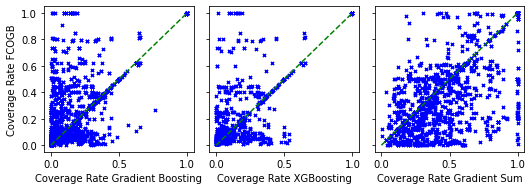

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(7.5,2.75), sharey=True, tight_layout=True, squeeze=False)
gpe_coverage=[]
gpe_orth_coverage=[]

for k in results:
    number=1
    if 'boosting' in k:
        for name in datapoints:
            if name in k:
                number = datapoints[name]
        print(k, number)
        for j in range(1,len(results[k][0])):
            gpe_coverage.append(results[k][0][j]/number/0.8)
            gpe_orth_coverage.append(results[k][1][j]/number/0.8)
# axs[0].set_aspect('equal', adjustable='box')
axs[0,0].plot([0,1],[0,1], 'g--')
axs[0,0].set_xlabel('Coverage Rate Gradient Boosting')
axs[0,0].set_ylabel('Coverage Rate FCOGB')
axs[0,0].scatter(gpe_coverage, gpe_orth_coverage,c='b',s=10,marker='x')

xgb_coverage=[]
xgb_orth_coverage=[]
for k in results:
    number=1
    if 'xgb_keep_' in k:
        for name in datapoints:
            if name in k:
                number = datapoints[name]
#         print(k, number)
        for j in range(1,len(results[k][0])):
            xgb_coverage.append(results[k][0][j]/number/0.8)
            xgb_orth_coverage.append(results[k][1][j]/number/0.8)
axs[0,1].plot([0,1],[0,1], 'g--')
axs[0,1].set_xlabel('Coverage Rate XGBoosting')
axs[0,1].scatter(xgb_coverage, xgb_orth_coverage,c='b',s=10,marker='x')


mwg_coverage=[]
mwg_orth_coverage=[]
for k in mwg_res:
    number=1
#     try:
    if 'mwg' in k:
        for name in datapoints:
            if name in k:
                number = datapoints[name]
        for j in range(1,len(mwg_res[k][1])):
            mwg_coverage.append(mwg_res[k][0][j]/number/0.8)
            mwg_orth_coverage.append(mwg_res[k][1][j]/number/0.8)
axs[0,2].plot([0,1],[0,1], 'g--')
axs[0,2].set_xlabel('Coverage Rate Gradient Sum')

axs[0,2].scatter(mwg_coverage, mwg_orth_coverage,c='b',s=10,marker='x')
fig.savefig('coverage.pdf')

In [19]:
c = 0
d=0
for i in range(len(gpe_coverage)):
    if gpe_coverage[i] > gpe_orth_coverage[i]:
        c+=1
    if gpe_orth_coverage[i]>0.5 and gpe_coverage[i]<0.5:
        d+=1
print((len(gpe_orth_coverage)-c)/len(gpe_orth_coverage))
print(d/len(gpe_orth_coverage))
# print(c)

0.7897340754483612
0.08039579468150897


In [20]:
c = 0
d=0
for i in range(len(xgb_orth_coverage)):
    if xgb_coverage[i] > xgb_orth_coverage[i]:
        c+=1
    if xgb_orth_coverage[i]>0.5 and xgb_coverage[i]<0.5:
        d+=1
print((len(xgb_orth_coverage)-c)/len(xgb_orth_coverage))
print(d/len(xgb_orth_coverage))
# print(c)

0.7127158555729984
0.059654631083202514


In [21]:
c = 0
d=0
for i in range(len(mwg_orth_coverage)):
    if mwg_coverage[i] > mwg_orth_coverage[i]:
        c+=1
    if mwg_orth_coverage[i]>0.5 and mwg_coverage[i]<0.5:
        d+=1
print((len(mwg_orth_coverage)-c)/len(mwg_orth_coverage))
print(d/len(mwg_orth_coverage))
# print(c)

0.4725274725274725
0.061224489795918366
